# Algorithms for Data Science


# Sampling

In [39]:
""" sample set """
from random import seed 
from random import random 
from numpy.random import randn
from random import sample 
from matplotlib import pyplot

seed(1)
for _ in range(3):
  print(random(), end=' ')
print()

sequence = [i for i in range(20)]
subset = sample(sequence, 5)
sequence, subset

0.13436424411240122 0.8474337369372327 0.763774618976614 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [8, 3, 15, 14, 17])

In [ ]:
""" histogram plot of a small(10) and larger(100) sample """ 
seed(1)
data = 50 * randn(100) + 100
data
pyplot.hist(data)
pyplot.show()

In [ ]:
""" sample of test dataset """ 
seed(1)
data = 50 * randn(10000) + 50
data
pyplot.hist(data, bins=100)
pyplot.show()

In [ ]:
""" sample of test dataset """ 
from numpy import percentile 
seed(1)
data = randn(1000)
# calculate quartiles
quartiles_ = percentile(data, [25, 50, 75])
data_min = data.min()
data_max = data.max()
print('min: %3f' % data_min)
print('Q1:  mean  Q3 %3f' % quartiles_[0], quartiles_[1], quartiles_[2])
print('max: %3f' % data_max)

min: -3.621507
Q1:  mean  Q3 -0.673084 -0.0378347298105291 0.6475518559830239
max: 2.943017


In [ ]:
""" generate dataset - sample 1""" 
# seed the random generator 
seed(1)
# generate two sets of univariate observations 
data1 = 50 + (randn(100) * 10)
data2 = 51 + (randn(100) * 10)
min(data1), max(data1), min(data2), max(data2)

(22.1336597546205, 68.18711123750828, 27.40101039764773, 74.30148876281663)

(-56.52887343681201, 73.14919960272258, -66.51663613785402, 86.63809205444278)

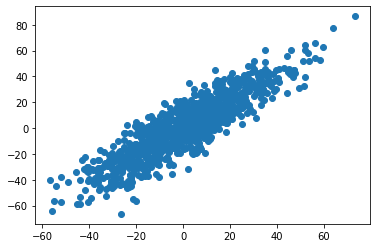

In [ ]:
""" generate dataset - sample 2 """ 
# seed the random generator 
seed(1)
# generate two sets of univariate observations 
data1 = (randn(1000) * 20)
data2 = data1 + (randn(1000) * 10)
pyplot.scatter(data1, data2)
min(data1), max(data1), min(data2), max(data2)

In [ ]:
from scipy.stats import rankdata
from math import sqrt 
confidence_interval = 1.96 * sqrt((0.2 * (1 -0.2))/100) # try 50, 100
ranked = rankdata(data)
data2[:10], ranked[:10], confidence_interval

(array([ 20.17422656, -26.80825124,  20.01584031,  -1.27918547,
        -43.53362979, -27.51783747,  -8.57550902,  18.19625629,
         11.2399954 ,  22.35445051]),
 array([248., 390., 844., 119., 782., 927., 123., 891., 359., 206.]),
 0.0784)

In [ ]:
#!pip install statsmodels
import statsmodels
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(88, 100, 0.05)
lower, upper

(0.8163087092715731, 0.943691290728427)

In [ ]:
""" bootstrap confidence interval """
from numpy.random import rand, randint
from numpy import mean, median, percentile

dataset = 0.5 + rand(1000) * 0.5
#dataset = data2
list_ = list()
for _ in range(5):
  # bootstrap sample 
  indices = randint(800, 950, 20)
  sample = dataset[indices]
  statistics = mean(sample)
  list_.append(statistics)
  #percentile_m = median(list_)
# calculate confidence interval 
alpha = 5.0 
# lower percentile like 2.5
lower_p = alpha / 2.0
lower = max(0.0, percentile(list_, lower_p))
# upper percentile like 97.5
upper_p = (100 - alpha) + (alpha / 2)
# retrieve observation at upper percentile 
upper = min(0.0, percentile(list_, upper_p))
dataset[:10], indices, sample, list_, (upper_p, upper)

(array([0.70535379, 0.67250874, 0.78146503, 0.59160189, 0.63332662,
        0.94460842, 0.73889027, 0.59664121, 0.76124831, 0.575163  ]),
 array([917, 853, 949, 803, 842, 816, 873, 932, 899, 935, 900, 935, 940,
        874, 874, 875, 902, 838, 916, 874]),
 array([0.62434895, 0.67254341, 0.84937572, 0.70189192, 0.99734726,
        0.6902178 , 0.59139686, 0.79436312, 0.64056341, 0.74386913,
        0.69858046, 0.74386913, 0.93900873, 0.58611606, 0.58611606,
        0.76650025, 0.86134528, 0.71809631, 0.70522642, 0.58611606]),
 [0.8018680351052891,
  0.751747918035965,
  0.7729710311896596,
  0.7761136729415414,
  0.7248446162847211],
 (97.5, 0.0))

In [ ]:
""" data resolution """ 
seed(1)
data = randn(100)  # univariate sample 
data = data.round(0)
pyplot.hist(data)
pyplot.show()

In [ ]:
""" data extreme events """ 
from numpy import zeros 
from numpy import append 

seed(1)
data = 5*randn(100) + 10  # univariate sample 
data = append(data, zeros(10))
pyplot.hist(data)
pyplot.show()

In [ ]:
""" data with long tail """ 
seed(1)
data = 5*randn(100) + 10  # univariate sample 
tail = 10 + (randn(50) * 100)
data = append(data, tail)
pyplot.hist(data)
pyplot.show()

In [ ]:
""" data with tail truncated """ 
seed(1)
data = 5*randn(100) + 10  # univariate sample 
tail = 10 + (randn(10) * 100)
data = append(data, tail)
# trim values 
data = [x for x in data if x< 25]
pyplot.hist(data)
pyplot.show()

In [ ]:
""" exponential - data log normal distribution """ 
from numpy import exp
seed(1)
data = 5*randn(100) + 50  # univariate sample 
# transform to be exponential 
data = exp(data)
pyplot.hist(data)
pyplot.show()

In [ ]:
""" box-cox transform """ 
from scipy.stats import boxcox
seed(1)
data = 5*randn(100) + 50  # univariate sample 
# transform to be exponential 
data = exp(data)
# power transform
data = boxcox(data, 0)
pyplot.hist(data)
pyplot.show()

In [ ]:
from scipy.stats import norm  
from numpy import arange
arr_x = arange(-3, 3, 0.001)
arr_y = norm.pdf(arr_x, 0, 1)
arr_x, arr_x.shape, arr_y

(array([-3.   , -2.999, -2.998, ...,  2.997,  2.998,  2.999]),
 (6000,),
 array([0.00443185, 0.00444516, 0.00445851, ..., 0.00447189, 0.00445851,
        0.00444516]))

In [ ]:
x = 2
def poly(x):
  return 3*x**2 -x +2 
print('polynomial function', poly(x))

def is_prime(n):
  i = 2
  for i in range(2,n):
    if n%i ==0: return False 
    i +=1
  return True
def prime_upto(n):
  i = 2
  while i <n: 
    if is_prime(i): print(i, end=' ')
    i +=1
  return n
print('prime ', is_prime(17))
print('[prime numbers up to n]', prime_upto(17))

polynomial function 12
prime  True
2 3 5 7 11 13 [prime numbers up to n] 17


In [ ]:
""" indexing """
binary_colors = ['r', 'b', 'g', 'y']
slice_= binary_colors[0:2]                        # Slicing complexity O(n)
print(slice_, slice_[:-1], binary_colors[:-1])    # Element retrieval O(n)
""" filtering """ 
a = [1,2,[100,200,300],6]
print(max(a[2]))
print(list(filter(lambda x: x> 100, [-3, 4, 5, 100, 200, 300])))
""" transformation - mapping """
list(map(lambda x: x**2, [-3, 4, 5, 100, 200, 300]))# Lamda O(n)
""" aggregation - reduce """ 
from functools import reduce 
def doSum(x1, x2):
  return x1 + x2
print(reduce(doSum, [100, 123, 143, 33, 4, 5, 6]))
""" range function """ 
x = range(6)
y = range(6, 23)
odd_number = range(3, 29, 2)
list(x), list(y), list(odd_number) # List insert O(1), Delete, Slice, Retrieve

['r', 'b'] ['r'] ['r', 'b', 'g']
300
[200, 300]
414


([0, 1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [ ]:
""" tuples """ 
binary_colors = ['r', 'b', 'g', 'y']
tuple(binary_colors[:-1]) # O(1) complexity and space 
""" dictionary """ 
binary_colors = {'refused_color': 'r', 'approved_color': 'b', 
                 'approved_color:': 'g', 'manual_color': 'y'}
binary_colors['manual_color'] # O(1) complexity set/get, and copy O(n)
""" sets """ 
binary_colors, set(binary_colors), list(binary_colors)

({'refused_color': 'r',
  'approved_color': 'b',
  'approved_color:': 'g',
  'manual_color': 'y'},
 {'approved_color', 'approved_color:', 'manual_color', 'refused_color'},
 ['refused_color', 'approved_color', 'approved_color:', 'manual_color'])

In [ ]:
""" dataframes """ 
import pandas as pd 
df = pd.DataFrame([
    ['1', 'str-1', 32, True], 
    ['2', 'str-2', 32, True],
    ['3', 'str-3', 32, False]])
df.columns = ['id', 'id-str', 'int', 'decision']
df; df[['id', 'decision']]
""" column/row selection """ 
df
df.iloc[:, 3]
df.iloc[1:3, :]
df[df.decision==True]

,id,id-str,int,decision
0,1,str-1,32,True
1,2,str-2,32,True


In [ ]:
import numpy as np
""" matrix operations """
matrix_ = np.array([[10, 11, 12, 13], [21, 22, 23, 24], [31, 32, 33, 34]])
matrix_, type(matrix_), matrix_.transpose()

(array([[10, 11, 12, 13],
        [21, 22, 23, 24],
        [31, 32, 33, 34]]), numpy.ndarray, array([[10, 21, 31],
        [11, 22, 32],
        [12, 23, 33],
        [13, 24, 34]]))

# Data Types

In [ ]:
""" Abstract Data Types - ADT """ 
vector_ = [22, 33, 44, 55]
vector_, type(vector_)

([22, 33, 44, 55], list)

In [ ]:
""" stacks - each operation O(1) complexity"""
class Stack:
  def __init__(self): self.items = []
  def isEmpty(self): return self.items == []
  def push(self, item): self.items.append(item)
  def pop(self):
    if len(self.items) ==0: return None
    return self.items.pop()
  def peek(self): return self.items[len(self.items) -1]
stack_ = Stack()
stack_.push(22); stack_.push(33); stack_.push(44); stack_.push(55);
stack_.pop(), stack_.pop(), stack_.pop(), stack_.pop(), stack_.pop()


(55, 44, 33, 22, None)

In [ ]:
""" Queue - each operation O(1) complexity - FIFO"""
class Queue:
  def __init__(self): self.items = []
  def isEmpty(self): return self.items == []
  def enqueue(self, item): self.items.insert(0, item)
  def dequeue(self):
    if len(self.items) ==0: return None
    return self.items.pop()
  def peek(self): return self.items[-1]
queue_ = Queue()
queue_.enqueue(22); queue_.enqueue(33); queue_.enqueue(44); queue_.enqueue(55);
queue_.dequeue(), queue_.dequeue(), queue_.dequeue(), queue_.dequeue()


(22, 33, 44, 55)

In [ ]:
""" ADT - Tree """ 
""" Node, Root, Level of Node, Siblings, Child-Parent, Degree, Leaf Node, Subtree"""

In [ ]:
""" swapping in Python """ 
var1 = 15 ; var2 = 17 
var1, var2 = var2, var1
var1, var2

(17, 15)

In [ ]:
list_u = [25, 26, 22, 24, 27, 23, 21]
print(list_u)
""" pass number of Bubble sort """
def bubble_sort_(list_):
  last_el_index = len(list_) -1
  for passNumber in range(last_el_index, 0, -1):
    for idx in range(passNumber):
      if list_[idx] > list_[idx+1]:
        list_[idx], list_[idx+1] = list_[idx+1], list_[idx]
      #print(idx+1, list_) 
  return list_
bubble_sort_(list_u)

[25, 26, 22, 24, 27, 23, 21]


[21, 22, 23, 24, 25, 26, 27]

In [ ]:
""" splitting the list """ 
list_u = [44, 16, 83, 7, 67, 21, 34, 45, 10]
def merge_sort(list_):
  if len(list_) > 1:
    mid_ = len(list_) //2
    list_left = list_[:mid_]
    list_right = list_[mid_:]
    #print(list_left)
    merge_sort(list_left)
    merge_sort(list_right)

    i, j, k = 0, 0, 0 
    while i < len(list_left) and j < len(list_right):
      if list_left[i] < list_right[j]:
        list_[k] = list_left[i]
        i +=1 
      else:
        list_[k] = list_right[j]
        j +=1
      k +=1
    while i < len(list_left):
      list_[k] = list_left[i] 
      i +=1 
      k +=1 
    while j < len(list_right):
      list_[k] = list_right[j] 
      j +=1 
      k +=1 
  return list_

merge_sort(list_u)  

[7, 10, 16, 21, 34, 44, 45, 67, 83]

In [ ]:
""" Shell Sort """ 
list_u = [26, 17, 20, 11, 18, 14, 12, 15, 44, 16, 83, 7, 67, 21, 34, 45, 10]
def shell_sort(list_):
  distance = len(list_) //2
  while distance > 0:
    for i in range(distance, len(list_)):
      tmp = list_[i]
      j = i 
      # sort the sublist for this distance 
      while j >= distance and list_[j - distance] > tmp:
        # print('\t\t swap', list_[j], ' and ', list_[j - distance], '--', tmp)
        list_[j] = list_[j - distance]
        j = j - distance 
        list_[j] = tmp 
      # print(list_, i, j )  
    distance //=  2 
  return list_
shell_sort(list_u)  

[7, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 26, 34, 44, 45, 67, 83]

In [ ]:
def selection_sort(list_): 
  for fill_slot in range(len(list_) -1, 0, -1):
    max_index = 0 
    for location in range(1, fill_slot +1):
      if list_[location] > list_[max_index]:
        max_index = location
    list_[fill_slot], list_[max_index] = list_[max_index], list_[fill_slot]
  return list_

list_u = [26, 17, 20, 11, 18, 14, 12, 15, 44, 16, 83, 7, 67, 21, 34, 45, 10]
selection_sort(list_u) 

[7, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 26, 34, 44, 45, 67, 83]

In [ ]:
def linear_s(list_, item):
  idx = 0 ; found = False 
  while idx < len(list_) and not found:
    if list_[idx] == item: 
      found =True 
    idx +=1 
  return found
list_u = [26, 17, 20, 11, 18, 14, 12, 15, 44, 16, 83, 7, 67, 21, 34, 45, 10]
linear_s(list_u, 83)

True

In [ ]:
def binary_s(list_, item):
  first, last  = 0, len(list_) -1 ; found = False
  while first <= last and not found:
    midpoint = first + (last - first)//2
    if list_[midpoint] == item: 
      found = True
      return found
    elif item < list_[midpoint]: 
        last = midpoint -1 
    else:
        first = midpoint +1
  return found 
list_u = [26, 17, 20, 11, 18, 14, 12, 15, 44, 16, 83, 7, 67, 21, 34, 45, 10]
selection_sort(list_u)
binary_s(list_u, 83), binary_s(list_u, 21),  

In [ ]:
""" interpolation search - more sophisticated using target value 
    to estimate the position of the element in the sorted array """ 
# to search for the word robust, start searching for words that start with r
def interpolation_search(list_, x):
  idx0 = 0 ; idxn = len(list_) -1 ; found = False 
  while idx0 <= idxn and x >= list_[idx0] and x <= list_[idxn]:
    # find the mid point 
    mid = idx0 + \
    int(((float(idxn-idx0)/(list_[idxn]-list_[idx0])) * (x-list_[idx0])))
    # print(mid)
    # compare the value at mid point with the search value 
    if list_[mid] == x:
      found = True ; return found 
    if list_[mid] < x:
      idx0 = mid +1 
  return found
list_u = [26, 17, 20, 11, 18, 14, 12, 15, 44, 16, 83, 7, 67, 21, 34, 45, 10]
selection_sort(list_u)
interpolation_search(list_u, 18)

True

In [ ]:
# calculate the frequency of each word in the list 
wordslist = ['python', 'java', 'ottawa', 'news', 'java', 'ottawa']
d_ = {}
for index, word in enumerate(wordslist): 
  if word not in d_: d_[index] = word
d_

{0: 'python', 1: 'java', 2: 'ottawa', 3: 'news', 4: 'java', 5: 'ottawa'}

In [ ]:
!pip install findspark
!pip install pyspark 
!env | grep spark
!env | grep pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 53.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a7bdb80699483f0ee3aaf792fc0df8a7e77894760dcb4f9cb63e5da9c63865ab
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


# Distributed Computing Framework

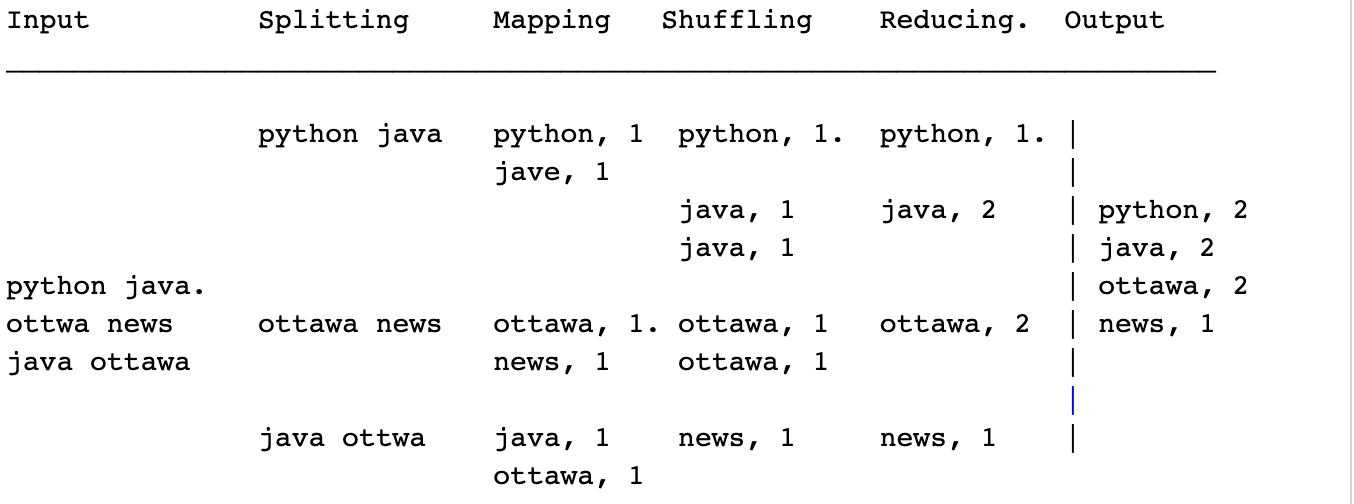

In [ ]:
""" divide and conquer Apache Spark 
Applications for this strategy to achieve scalability in Cloud Computing:
  - Microsoft Azure, AWS, GCP 
  - Components using this strategy for word count 
"""

""" 1. use Apache Spark to create a runtime context of Apache Spark """
import findspark
findspark.init()
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master('local[*]').getOrCreate()
sc = spark.sparkContext
""" 2. use the sample list with words """ 
wordslist = ['python', 'java', 'ottawa', 'news', 'java', 'ottawa']
""" RDD: Resilient Distributed Dataset """ 
wordsRDD = sc.parallelize(wordslist, 4)
""" 3. Use Map function to convert words into a key-value pair """ 
wordPairs = wordsRDD.map(lambda w: (w, 1))
""" 4. Use Reduce function to aggregate and get the final result """ 
wordCountsCollected = wordPairs.reduceByKey(lambda x, y: x+y)
wordslist, wordsRDD.collect(), wordPairs.collect(), wordCountsCollected.collect()


(['python', 'java', 'ottawa', 'news', 'java', 'ottawa'],
 ['python', 'java', 'ottawa', 'news', 'java', 'ottawa'],
 [('python', 1),
  ('java', 1),
  ('ottawa', 1),
  ('news', 1),
  ('java', 1),
  ('ottawa', 1)],
 [('python', 1), ('java', 2), ('ottawa', 2), ('news', 1)])

In [2]:
""" Dynamic Programming Strategy - Memoization 
OR memorization also called intelligent caching 
introduced by Richard Bellman for algorithm optimization 
  1. Divide into subproblems
  2. Each subproblem involves and operation/calculation performed 
     that is repeated and cached so that the operation is performed once. 
""" 
""" 
  TSP Problem 
  Input: A list og n cities denoted as V, and the distance between each pair 
  of cities, d if (1 <= i, j <= n)
  Output: The shortest tour that visits each city exactly once 
  -           Ottawa    Montreal    Kingston    Toronto   Sudbury
  Ottawa      -         199         196         450       484
  Montreal    199       -           287         542       680
  Kingston    196       287         -           263       634
  Toronto     450       542         263         -         400
  Sudbury     484       680         634         400       -

  Trip: Ottawa-Sudbury-Montreal-Kingston-Toronto-Ottawa with a cost of 
  (484 + 680 + 287 + 263 + 450 = 2164)

  Brute-force: evaluate all possible tours, choose the one with lower cost
  (n-1)!
  - calculate absolute distance between two points 
  - calculate the total distance in a given tour for the TSP 
  - randomly generate a set of n cities located in a layout 500x300
""" 
from itertools import permutations 
import random, math

<ipython-input-24-0c278a10c89b>:17: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


((23+142j), (155+96j), (175+62j), (299+92j), (442+24j), (467+141j), (444+157j), (187+262j), (12+295j), (29+215j), (23+142j))
((23+142j),)


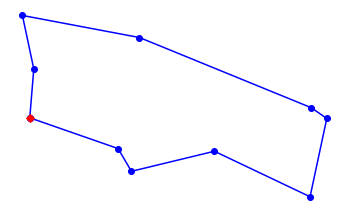

In [24]:
from tables.utils import clock
from collections import Counter
from time import clock_gettime
import matplotlib.pyplot as plt 
%matplotlib inline 

aCity = complex 
alltours = permutations
number_of_cities = 5 

def distance_points(first, second):
  return abs(first - second)
def distance_tour(aTour):
  return sum(distance_points(aTour[i -1], aTour[i]) for i in range(len(aTour)))
def generate_cities(number_of_cities):
  seed = 111 ; width = 500 ; height = 300
  random.seed((number_of_cities, seed))
  return frozenset(aCity(random.randint(1, width), random.randint(1, 
                  height)) for c in range(number_of_cities))
""" generate all possible tours of cities, to choose the shortest distance """
def brute_force(cities):
  return shortest_tour(alltours(cities))
def shortest_tour(tours):
  return min(tours, key=distance_tour)
""" plot cities and links in a segment """ 
def visualize_segment(segment, style='bo-'):
  plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on = False)
  print(segment)
  plt.axis('scaled')
  plt.axis('off')
""" plot all the cities and links in a tour and highlight where it started """
def visualize_tour(tour, style='bo-'): 
  if len(tour) > 1000: plt.figure(figsize=(15, 10))
  start = tour[0:1]
  visualize_segment(tour + start, style)
  visualize_segment(start, 'rD')
def X(city): 'X axis' ; return city.real
def Y(city): 'Y axis' ; return city.imag
""" implement TSP with the algorithm steps and visualize by generating a plot """
def name(algorithm): return algorithm.__name__.replace('_tsp', '')
def tsp(algorithm, cities):
  t_0 = clock()
  tour = algorithm(cities)
  t_1 = clock()
  assert Counter(tour) == Counter(cities)
  visualize_tour(tour) 
  #print('{}: {} cities = tour length {:.0f} (in {:.3f} sec)'.format(
      #name(algorithm), len(tour), distance_tour(tour), t_1 - t_0))
tsp(brute_force, generate_cities(10))


[(12+295j), (29+215j), (23+142j), (155+96j), (175+62j), (299+92j), (442+24j), (467+141j), (444+157j), (187+262j), (12+295j)]
[(12+295j)]


<ipython-input-24-0c278a10c89b>:17: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


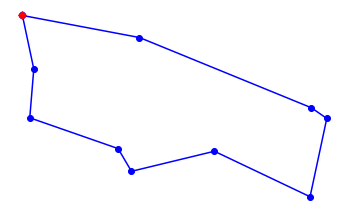

In [25]:
def greedy_algorithm(cities, start=None):
  C = start or first(cities)
  tour = [C]
  unvisited = set(cities - {C})
  while unvisited:
    C = neareset_neighbor(C, unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour 

def first(collection): 
  return next(iter(collection))
def neareset_neighbor(A, cities):
  return min(cities, key=lambda C: distance_points(C, A))

tsp(greedy_algorithm, generate_cities(10))

<ipython-input-19-7915faea784c>:17: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


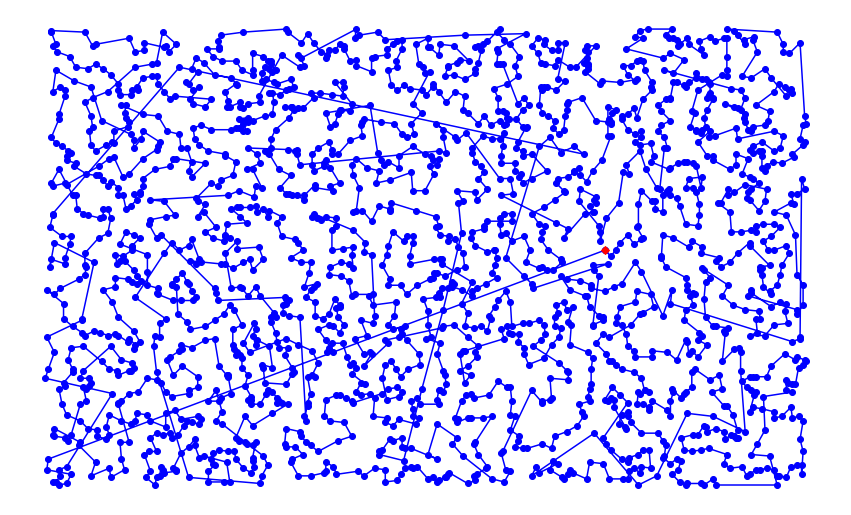

In [21]:
tsp(greedy_algorithm, generate_cities(2000))

**PageRank algorithm**

Rank the Web Pages using some criteria to refine the results 

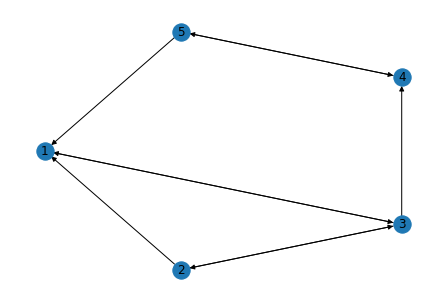

array([[0.        , 0.5       , 0.33333333, 0.        , 0.5       ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [1.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

In [23]:
""" calculate the importance of each page returned in query results 
    quantify the importance of a particular page, have the algorithm 
    incorporate two components 1) Information specific to the query 
    entered by the user and 2) information not related 
""" 
""" import the necessary libraries """ 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
myWeb = nx.DiGraph()
myPages = range(1,5)
""" connect them randomly to simulate a network """ 
connections = [ (1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4) ]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
""" plot the graph """ 
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()
""" PageRank algorithm """ 
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
       if count>0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set) / float(nodes_set)
  if np.min(np.sum(G, axis=0)) < 1.0:
    print('G is substochastic')
  return G, p 

G, p = createPageRank(myWeb)
G

PageRank algorithm Eigenvalue centrality 

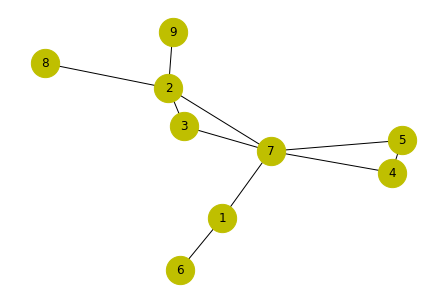

In [ ]:
vertices = range(1, 5)
edges = [ (7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9) ]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='y', node_size=800)

In [ ]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 7: 0.625,
 5: 0.25,
 6: 0.125,
 8: 0.125,
 9: 0.125}

({1: 0.25,
  2: 0.46428571428571425,
  3: 0.0,
  4: 0.0,
  7: 0.7142857142857142,
  5: 0.0,
  6: 0.0,
  8: 0.0,
  9: 0.0},
 None)

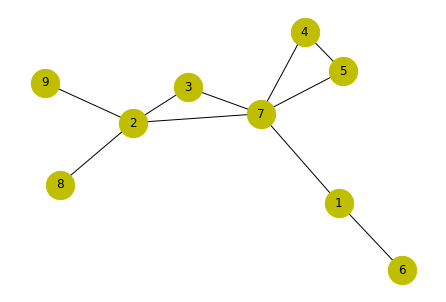

In [ ]:
nx.betweenness_centrality(G), nx.draw(G, with_labels=True, node_color='y', node_size=800)

({1: 0.5,
  2: 0.6153846153846154,
  3: 0.5333333333333333,
  4: 0.47058823529411764,
  7: 0.7272727272727273,
  5: 0.47058823529411764,
  6: 0.34782608695652173,
  8: 0.4,
  9: 0.4},
 None)

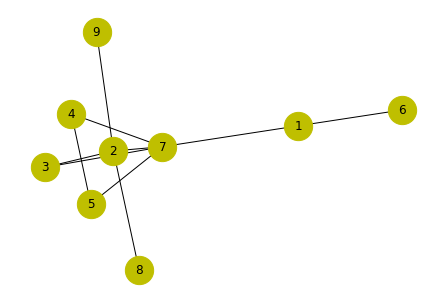

In [ ]:
nx.closeness_centrality(G), nx.draw(G, with_labels=True, node_color='y', node_size=800)

BFS/DFS traversals below 

Use Case fraud(F) / non-fraud(NF) 

- Fraud analytics: P(F/q) = i/degree_q * Sum(w(n, nj)DOS_normalize
- Negative outcome: Negative outcome score
  - involvement in CC theft: 8 
  - fake check submission: 7 
  - criminal record: 6 
  - no record: 0  
- DOS (degree of suspicion)

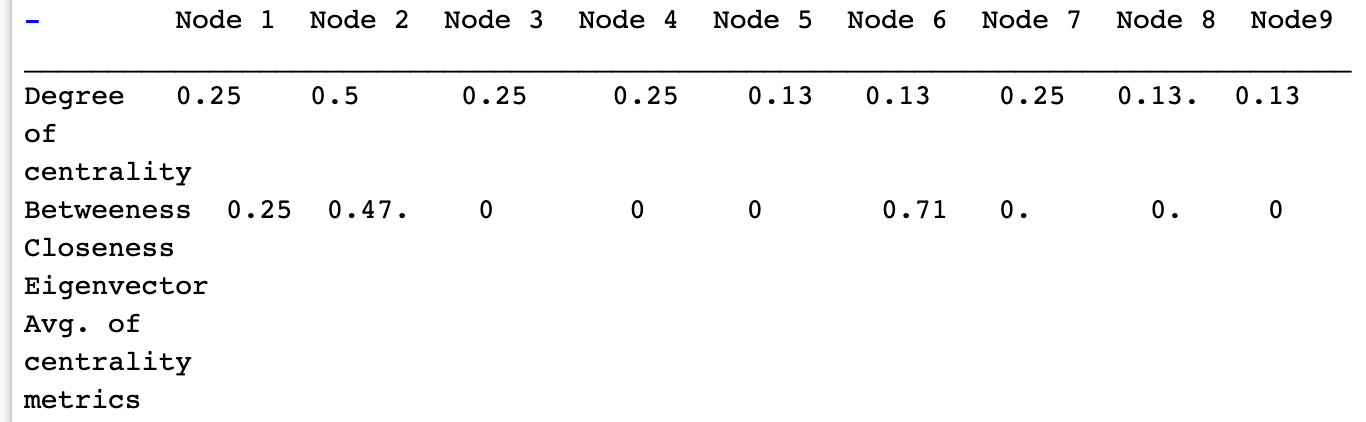

DOS criteria for the risk fraud associated with the nodes added to the system 

- **Value of DOS: Risk classification**
- DOS = 0 : No risk 
- 0 < DOS <= 0.10 : Low risk 
- 0.10 < DOS <= 0.3 : Medium risk 
DOS > 0.3 : High risk 

In [ ]:
edge_labels_ = {
    1: 'DOS=0', 2: 'DOS=0.47', 3: 'DOS=0', 4: 'DOS=0', 5: 'DOS=0.27',
    6: 'DOS=0.17', 7: 'DOS=1', 8: 'DOS=0', 9: 'DOS=0'
}
edge_labels_

{1: 'DOS=0',
 2: 'DOS=0.47',
 3: 'DOS=0',
 4: 'DOS=0',
 5: 'DOS=0.27',
 6: 'DOS=0.17',
 7: 'DOS=1',
 8: 'DOS=0',
 9: 'DOS=0'}

{1: Text(-0.3498489221916721, 0.6019367427658756, '1NF'),
 2: Text(-0.004424544071409918, -0.5191347785461926, '2 F'),
 3: Text(0.2117040670840778, -0.23963179785390643, '3NF'),
 4: Text(0.5576645726844635, 0.3516886930178679, '4NF'),
 5: Text(0.3594044587691178, 0.5680430051071902, '5 F'),
 6: Text(-0.6897919212426453, 0.9634278341216487, '6 F'),
 7: Text(0.0970825102451391, 0.15646135153124796, '7 F'),
 8: Text(0.18027278430405358, -1.0, '8NF'),
 9: Text(-0.36206300558112503, -0.8827910501437323, '9NF')}

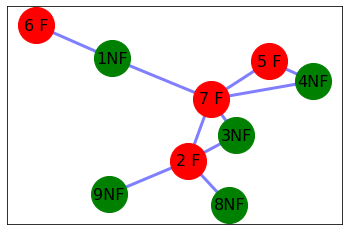

In [ ]:
import networkx as nx 
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
""" define the NF nodes """ 
nx.draw_networkx_nodes(G, pos, nodelist=[1,4,3,8,9], node_color='g', node_size=1300)
""" define F nodes """ 
nx.draw_networkx_nodes(G, pos, nodelist=[2,5,6,7], node_color='r', node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5, edge_color='b')
#nx.draw_networkx_edge_labels(G, pos)
labels = {}
labels[1] = r'1NF' ; labels[2] = r'2 F' ; labels[3] = r'3NF' ; 
labels[4] = r'4NF' ; labels[5] = r'5 F' ; labels[6] = r'6 F' ;
labels[7] = r'7 F' ; labels[8] = r'8NF' ; labels[9] = r'9NF' ;
nx.draw_networkx_labels(G, pos, labels, font_size=16)


# Linear Programming

Algorithm by George Dantzig 

- Formulate the linear programming problem
- Define Objective Function 
- Specify the constraints
- Use Case - Capacity Planning 
  Robot manufacturing - basic and advanced model (full functionality)

In [ ]:
!pip install pulp 
import pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 4.9 MB/s 


**Centrality measures** 
- Concepts: Betweeness, Closeness, Eigenvectors 

**Adavanced Data topics prior to ML algorithms review**
- Google use cases (Maps, File Storage)

Data-mining lifecycle:
- CRISP-DM (Cross Industry Standard Process for Data mining) life cycle
- SEMMA (Sample, Explore, Modify, Model, Access)  data mining process 

In [ ]:
""" voice categorization use case """

In [ ]:
""" document categorization """ 

The reliability of the grouping created by clustering algorithms is based on the assumption thatwe can accurately quantify the similarities or closeness 
between various data points in the problem space. 

**Quantifying similarities**
 - Euclidian distance measure 
 - Manhattan distance measure 
 - Cosine similarity - distance measured 

**K-means clustering algorithm** it triesto create a number of clusters, k,
calculating the means to find the closeness between the data points. 
It uses relative simple clustering approach but it faster and it scales. 
Algorithmically, k-means clustering uses an iterative logic that moves the centers of the clusters until they reflect the most representative data point of the grouping they belong to. 
The lean-and-mean design makes k-means suitable for larger datasets. 
**Logic of k-means clustering **
1. Choose the numbr of clusters, k 
2. Among the data points, we randomly choose k points as cluster centers 
3. Based on the selected distance measure, iteratively compute the distance from each point of the k cluster centers. Based on the size of the dataset, 
we decided what the k is to be. 
4. We assign each data point in the problem space to the nearest cluster center 
5. Assign each data point in the problem space to the nearest cluster center 
6. If any change, recompute the cluster assignment for each data point
7. stop condition where we have the current maximum number of iterations

**Hierarchical clustering**
1. Separate the cluster for each data point in problem space 
   - if problem space consists of 100 data points, then it will start with 100 clusters 
2. group only those points close to each other 


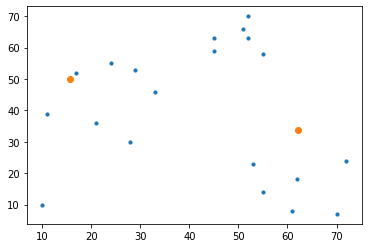

In [ ]:
""" k-means algorithm """ 
from sklearn import cluster 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

dataset = pd.DataFrame({
    'x': [11, 21, 28, 17, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 
          62, 70, 72, 10],
    'y': [39, 36, 30, 52, 53, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 
          18, 7, 24, 10]
})

Kmeans_ = cluster.KMeans(n_clusters=2)
Kmeans_.fit(dataset)
centroids_ = Kmeans_.cluster_centers_ 
labels = Kmeans_.labels_
labels, centroids_
plt.scatter(dataset['x'], dataset['y'], s=10)
plt.scatter(centroids_[0], centroids_[1])
plt.show()

In [ ]:
""" hierarchichal clustering """ 
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
""" data in in two dimmensional space """
dataset = pd.DataFrame({
    'x': [11, 21, 28, 17, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 
          62, 70, 72, 10],
    'y': [39, 36, 30, 52, 53, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 
          18, 7, 24, 10]
})
""" hierarchical cluster by specifying the hyperparameters 
    use fit_predict function to actually process the algorithm """ 
#cluster = \
#AgglomerativeClustering(n_clusters=2, affinity='euclidian', linkage='ward')
cluster = AgglomerativeClustering(n_clusters=2) #euclidian the default 
cluster.fit_predict(dataset), cluster.labels_


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]))

**Evaluation for Clustering algorithms:**
- The data points that belongs to the same cluster as similar as possible 
- The data points that belongs to separate cluster as different as possible 

Use range for association with each cluster and data points in neighnoring clusters 

- Range      Meaning.  Description 
__________________________________________________________________________
- 0.71-1     excellent    k-clustering results in groups quite different 
- 0.51-0.70  reasonable   groups somewhat differentiable 
- 0.26-0.5   weak         quality of the grouping should not be relied upon 
- < 0.25     no clustering has been found 

**Applications:**
- Demographics(social analysis) 
- Market research(segmentation, targeted advertisement, customer categorization)

**Principal component analysis (PCA)**
- Remove noise from real time data such as stock market trading 

**Dimensionality reduction**
- Feature selection important to contextualize the problem we are solving 
- Feature aggregation to reduce dimensions by using 
    - PCA in a linear unsupervised ML algorithm 
    - LDA in a liner supervised ML algorithm 
    - Kernel principal component in a non-linear algorithm 

In [ ]:
""" PCA - PC1 and PC2 """ 
from sklearn.decomposition import PCA
names_ = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 
          'class']
iris = pd.read_csv('iris.csv', names=names_)
X = iris.drop('class', axis=1)
pca_ = PCA(n_components=4)
fit_ = pca_.fit(X)

pca_df = (pd.DataFrame(pca_.components_, columns=X.columns))
""" calculate PC1 and PC2 using coefficients that are generated """ 
X['PC1'] = X['sepal-length'] * pca_df['sepal-length'][0] + \
           X['sepal-width']  * pca_df['sepal-width'][0] + \
           X['petal-length'] * pca_df['petal-length'][0] + \
           X['petal-width']  * pca_df['petal-width'][0] 

X['PC2'] = X['sepal-length'] * pca_df['sepal-length'][1] + \
           X['sepal-width']  * pca_df['sepal-width'][1] + \
           X['petal-length'] * pca_df['petal-length'][1] + \
           X['petal-width']  * pca_df['petal-width'][1] 

X['PC3'] = X['sepal-length'] * pca_df['sepal-length'][2] + \
           X['sepal-width']  * pca_df['sepal-width'][2] + \
           X['petal-length'] * pca_df['petal-length'][2] + \
           X['petal-width']  * pca_df['petal-width'][2] 

X['PC4'] = X['sepal-length'] * pca_df['sepal-length'][3] + \
           X['sepal-width']  * pca_df['sepal-width'][3] + \
           X['petal-length'] * pca_df['petal-length'][3] + \
           X['petal-width']  * pca_df['petal-width'][3] 
X['PC1'][:]

0      2.827136
1      2.795952
2      2.621524
3      2.764906
4      2.782750
         ...   
145    7.455360
146    7.037007
147    7.275389
148    7.412972
149    6.901009
Name: PC1, Length: 150, dtype: float64

In [ ]:
X

,sepal-length,sepal-width,petal-length,petal-width,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,2.827136,5.641331,-0.664277,-0.037715
1,4.9,3.0,1.4,0.2,2.795952,5.145167,-0.846287,0.060882
2,4.7,3.2,1.3,0.2,2.621524,5.177378,-0.618056,-0.019416
3,4.6,3.1,1.5,0.2,2.764906,5.003599,-0.605093,-0.114676
4,5.0,3.6,1.4,0.2,2.782750,5.648648,-0.546535,-0.101849
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,7.455360,5.502139,-0.463462,0.386361
146,6.3,2.5,5.0,1.9,7.037007,4.939703,-0.763402,0.217002
147,6.5,3.0,5.2,2.0,7.275389,5.393243,-0.511981,0.097574
148,6.2,3.4,5.4,2.3,7.412972,5.430600,0.080108,0.002152


In [ ]:
""" Variance ratio 
    1. if we choose to replace the original four columns with
    features PC1, they will capture 92.3% of the variance od the initial 
    variables, with some approximations introduced by not capturing 100%

    2. if we choose to replace with PC1 and PC2, then we will capture an 
    additional 5.3% of the variance of the initial variables 

    3. if we choose to replace with PC1, PC2, and PC3, then we will now 
    capture a further 0.017% of the variance of the initial variables

    4. if we choose to replace the original four variables, with four 
    features PC1, PC2, PC3 and PC4 then we will capture 100% of the variances
    of the original variables (92.4 + 0.053 + 0.017 + 0.005). But replacing
    with PC1-PC4 is meaningless as we did not reduce the dimentionality, 
    which remains 4 and we haven't achieved it. 
"""
print(fit_.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


**Limitations of PCA** 

1. PCA can only be used for continuous variables and not categories 
2. PCA simplifies the problem with the dimensionality reduction at the expense of accuracy. This is a trade-off studied before being used. 


Classification (continuing with the dataset used for PCA)

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 4551 bytes


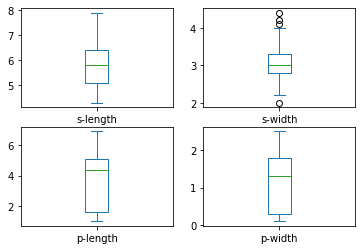

In [ ]:
""" classifications with iris dataset """ 
from google.colab import files
from pandas import read_csv
from pandas.plotting import scatter_matrix

""" load the dataset """ 
names_ = ['s-length', 's-width', 'p-length', 'p-width', 'class']
dataset = read_csv('iris.csv', header=None, names=names_)

#dataset.shape, dataframe.describe(), dataframe.groupby('class').size()
#scatter_matrix(dataframe), dataframe.describe()
""" visualization """ 
import matplotlib 
from matplotlib import pyplot
import pandas.plotting

""" box plots """
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

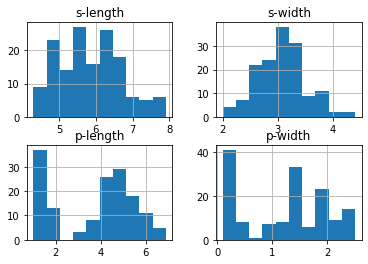

In [ ]:
""" histograms """
dataset.hist()
pyplot.show()

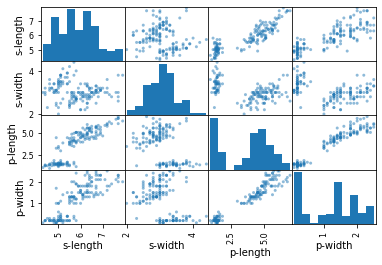

In [ ]:
""" scatter plot matrix """ 
scatter_matrix(dataset)
pyplot.show()

LR 0.958333 (0.055902)
LDA 0.975000 (0.038188)
KNN 0.983333 (0.033333)
CART 0.950000 (0.076376)
NB 0.966667 (0.040825)
SVM 0.991667 (0.025000)


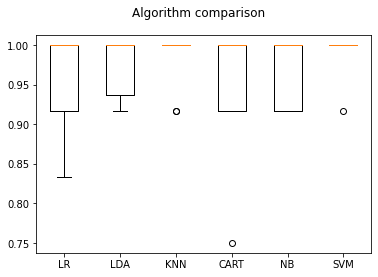

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

""" split out the data """ 
array = dataset.values 
X_ = array[:, 0:4]
Y_ = array[:, 4]
validation_size = 0.20 
seed = 7 
X_train, X_validation, Y_train, Y_validation = \
  train_test_split(X_, Y_, test_size=validation_size, random_state=seed)

""" spot check algorithms """ 
models = \
  [('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
   ('LDA', LinearDiscriminantAnalysis()),
   ('KNN', KNeighborsClassifier()),
   ('CART', DecisionTreeClassifier()),
   ('NB', GaussianNB()),
   ('SVM', SVC(gamma='auto'))]
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg = '%s %f (%f)' \
        % (name, cv_results.mean(), cv_results.std())
  print(msg)

""" compare algorithms """ 
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [ ]:
""" make predictions on validation sets """ 
knn_ = KNeighborsClassifier()
knn_.fit(X_train, Y_train)
predictions = knn_.predict(X_validation)
accuracy_score(Y_validation, predictions)

0.9

In [ ]:
confusion_matrix(Y_validation, predictions)

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]])

In [ ]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
X['PC1'][:] 
type(array)
xy = np.array([X['PC1'][0:4], X['PC2'][0:4], X['PC3'][0:4]])
array_ = np.array(X[:][:])
array.shape, array_.shape, X.shape
X_ = array_[:, 4:8]
Y_ = array_[:, 4]
X_.shape, Y_.shape

((150, 4), (150,))

In [ ]:
array = dataset.values 
X_ = array[:, 0:4]
Y_ = array[:, 4]
X_.shape, Y_.shape

((150, 4), (150,))

In [ ]:
""" use PCA - TBD """

In [ ]:
""" data and model encryption with the iris dataset """ 
import cryptography as crypt 
from cryptography.fernet import Fernet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import pickle
from pickle import dump 


iris_2 = load_iris()
X = iris_2.data 
y = iris_2.target 

"""
array = dataset.values 
X_ = array[:, 0:4]
Y_ = array[:, 4]
seed = 7 
"""

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
model.fit(X_train, y_train)
file_source = 'model_source_.sav'
file_destination = 'model_destination.sav'
file_secure = 'model_secure.sav'
dump(model, open(file_source, 'wb'))
""" generate a symmetric key and store in the key file """ 
def write_key():
  key = Fernet.generate_key()
  with open('key.key', 'wb') as key_file:
    key_file.write(key)
def load_key():
  return open('keys.key', 'rb').read()
""" encrypt function that encrypts the train model, and stores it """ 
def encrypt(file_source, key):
  f = Fernet(key)
  with open(file_source, 'rb') as file:
    file_data = file.read()
  encrypted_data = f.encrypt(file_data)
  with open(file_secure, 'wb') as file: 
    file.write(encrypted_data)

write_key()
encrypt(file_source, load_key())

""" unencrypt file to load the model for use for predictions """ 
def decrypt(file_secure, key):
  f = Fernet(key)
  with open(file_secure, 'rb') as file:
    encrypted_data = file.read()
  decrypted_data = f.decrypt(encrypted_data)
  with open(file_destination, 'wb') as file: 
    file.write(decrypted_data)

decrypt(file_secure, load_key())

loaded_model = pickle.load(open(file_destination, 'rb'))
result_ = loaded_model.score(X_test, y_test)
result_ 

0.9736842105263158

# Scaling Datasets

In [ ]:
import numpy as np
nb_samples = 200 
mu_ = [1.0, 1.0]
covm_ = [[2.0, 0.0], [0.0, 0.8]]
X = np.random.multivariate_normal(mean=mu_, cov=covm_, size=nb_samples)
X[3:7]

array([[-0.38293445,  2.28796752],
       [-1.38710061,  0.15506247],
       [ 1.83595505, -0.19979202],
       [ 1.07752566,  0.71118854]])

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)
rs = RobustScaler(quantile_range=(10, 90))
X_rs = rs.fit_transform(X)
mms = MinMaxScaler(feature_range=(-1, 1))
X_mms = mms.fit_transform(X)

# Association Rules
  - trivial, inexplicable, actionable 

# Ranking rules
  - support (frequency of items): 
      - how frequent a pattern we are looking for is in the dataset 
      - support(itemset_alpha) = num_itemset_alpha/num_total 
  - confidence:
      - the number that quantifies how strongly we can associate the left side (X) and the right side (Y) by calculating conditional probability 
      - confidence(x->y) = support(X union Y) / support(X) 
  - lift: 
      - another way to estimate the quality of a rule by calculating the lift
      - it returns a number that quantifies how much improvement has been achieved by a rule at predicting the result compared to just assuming the result at the right-hand side of the equation. If X and Y itemsets are independent, then the lift is calculated by the formula 
      - lift(x->y) = support(X union Y) / support(X)xsupport(Y)
  

# Algorithms
  - Apriori algorithm 
      - candidate generation phase 
      - filter phase filters out the rules below expected confidence threshold 
  - FP-growth algorithm 
      - populating FP tree 
      - mining frequent patterns 

# FP-Growth Algorithm

In [ ]:
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5505 sha256=a2263059db96b58e38bb8be6ee9659ed2eaca132a42d032e75e5a76850b06d59
  Stored in directory: /root/.cache/pip/wheels/29/e2/a7/ccb34c35e2c6737d3f09b53784f4323b7ff556a5f02096c70d
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth as fp
dictionary_1 = {
    'id': [0,1,2,3],
    'items': [
        ['wickets', 'pads'],
        ['bat', 'wickets', 'pads', 'helmet'],
        ['helmet', 'pad'],
        ['bat', 'pads', 'helmet']]
}
transaction_set = pd.DataFrame(dictionary_1)
print(transaction_set)

   id                         items
0   0               [wickets, pads]
1   1  [bat, wickets, pads, helmet]
2   2                 [helmet, pad]
3   3           [bat, pads, helmet]


In [ ]:
""" code, analysis, discuss the limitations """ 
# ItemSet_CandidateRules = { item1, item2,..., itemm} 2^m possible itemsets 
patterns = fp.find_frequent_patterns(transaction_set['items'], 1)
patterns

{('pad',): 1,
 ('helmet', 'pad'): 1,
 ('wickets',): 2,
 ('pads', 'wickets'): 2,
 ('bat', 'wickets'): 1,
 ('helmet', 'wickets'): 1,
 ('bat', 'pads', 'wickets'): 1,
 ('helmet', 'pads', 'wickets'): 1,
 ('bat', 'helmet', 'wickets'): 1,
 ('bat', 'helmet', 'pads', 'wickets'): 1,
 ('bat',): 2,
 ('bat', 'helmet'): 2,
 ('bat', 'pads'): 2,
 ('bat', 'helmet', 'pads'): 2,
 ('pads',): 3,
 ('helmet',): 3,
 ('helmet', 'pads'): 2}

In [ ]:
# generate the rules 
rules = fp.generate_association_rules(patterns, 0.4)
rules

{('pad',): (('helmet',), 1.0),
 ('pads',): (('helmet',), 0.6666666666666666),
 ('wickets',): (('bat', 'helmet', 'pads'), 0.5),
 ('bat',): (('helmet', 'pads'), 1.0),
 ('bat', 'pads'): (('helmet',), 1.0),
 ('bat', 'wickets'): (('helmet', 'pads'), 1.0),
 ('pads', 'wickets'): (('bat', 'helmet'), 0.5),
 ('helmet', 'pads'): (('bat',), 1.0),
 ('helmet', 'wickets'): (('bat', 'pads'), 1.0),
 ('bat', 'helmet'): (('pads',), 1.0),
 ('bat', 'helmet', 'pads'): (('wickets',), 0.5),
 ('bat', 'helmet', 'wickets'): (('pads',), 1.0),
 ('bat', 'pads', 'wickets'): (('helmet',), 1.0),
 ('helmet', 'pads', 'wickets'): (('bat',), 1.0),
 ('helmet',): (('pads',), 0.6666666666666666)}

# Twitter Use Case

Unsupervised learning - clustering similar tweets together 
- **Step1**: Topic Modeling (various topics from a given set of tweets)
    - Latent Dirichlet Allocation 
    - tokenize tweets 
    - preprocess the data, remove the stopwrods, numbers, symbols and perform stemming 
    - create a term-document-matrix(TDM) for the tweets. Select the top 200 words that appear most frequently in unique tweets
    - Select top 10 words that directly or indirectly represent a concept or a topic. The 10 words are now the topics that are successfully discovered and will become the cluster centers for the tweets
- **Step2**: Clustering by associating each of the tweets with one of the 
discovered topics
    - run K-means clustering algorithm that will assign each of the tweets to one f the cluster centers 
- Real-time processing of input data 


# Huffman coding

In [ ]:
""" 
coding, codeword, fixed-length coding, variable-length coding, prefix, eval 

character   frequency   fixed length variable length 
                        code          code 
_______________________________________________________
    L         0.45      000           0
    M         0.13      001           101 
    N         0.12      010           100 
    X         0.16      011           111
    Y         0.09      100           1101
    Z         0.05      101           1100

"""

In [ ]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 1.8 MB/s 


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
import ssl, urllib, urllib.request, urllib.parse, urllib.error, json

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'
def oauth():
  return {
      'consumer_key': '',
      'consumer_secret': '', 
      'token_key': '',
      'token_secret': ''
  }
ctx = ssl.create_default_context()
ctx.check_hostname = False 
ctx.verify_node = ssl.CERT_NONE

# connection = urllib.request.urlopen(url, context=ctx)

In [ ]:
""" Twitter real time sentiment analysis 
7000 tweets per second on a variety of topics 

Capture real time the emotions of news from different sources 
  - import the needed packages, VADER 
  - VADER Valence Aware Dictionary and Sentiment Reasoner
  - tweepy the Python based API to access twitter 
  - API keys to use the developer account for Authentication 
  - extract the tweets and create a graph to display the polarity of news 
    for each individual source 
  - produce and interpret summary statistics 
""" 
import tweepy, json, time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
analyzer = SentimentIntensityAnalyzer()

twitter_consumer_key = '#########'
twitter_consumer_secret = '###########'

twitter_bearer_token = '###########'

twitter_access_token = '###########'
twitter_access_token_secret = '###########'

twitter_client_secret = '###########'

""" Tweepy API authentication """ 
auth = tweepy.OAuthHandler(twitter_consumer_key, 
                           twitter_consumer_secret)
auth.set_access_token(twitter_access_token, 
                      twitter_access_token_secret)
api = tweepy.API(auth, 
                wait_on_rate_limit=True, wait_on_rate_limit_notify=True,
                parser=tweepy.parsers.JSONParser())

user_ = api.me()

#user_[id] == '1564454514'
user_.get(id)

In [ ]:
""" 
Auth URL -  https://twitter.com/i/oauth2/authorize
Access Token URL -  https://api.twitter.com/2/oauth2/token
Client ID - Your OAuth2.0 client ID from Dev Portal
Client Secret - If you are using a confidential client
Update Scope - Scopes to match the endpoints you want to connect to. 

"""
print('Start ... collecting tweets from source')

def user_timeline_tweets(news_sources):
    arr_sentiments = []
    for user in news_sources:
      count_tweet = 100
      print('Start tweets from %s'%user)
      for x in range(5):
        public_tweets = api.user_timeline(user, pages=x)
        # print(public_tweets)
        # for each tweet
        for tweet in public_tweets:
          # calculate the compund, _ive, -ive, and neutral value for each tweet 
          compound = analyzer.polarity_scores(tweet['text'])['compound']
          pos_ = analyzer.polarity_scores(['text'])['pos']
          neu_ = analyzer.polarity_scores(['text'])['neu']
          neg_ = analyzer.polarity_scores(['text'])['neg']

          arr_sentiments.append({
              'Media': user,
              'Tweet Text': tweet['text'],
              'Compound': compound,
              'Positive': pos_, 
              'Negative': neg_,
              'Neutral': neu_, 
              'Date': tweet['created_at'],
              'Tweets Ago': count_tweet})
          count_tweet -=1

    print('Done with extracting tweets')
    return arr_sentiments



Start ... collecting tweets from source


In [ ]:
#news_sources = ('@BBC', '@CBSNews', '@CNN',  '@FoxNews', '@TIME')
news_sources = ('@FoxNews', '@CNN')

array_sentiments = user_timeline_tweets(news_sources)
type(array_sentiments)
sentiments_df = pd.DataFrame(array_sentiments)

Start tweets from @FoxNews
Start tweets from @CNN
Done with extracting tweets


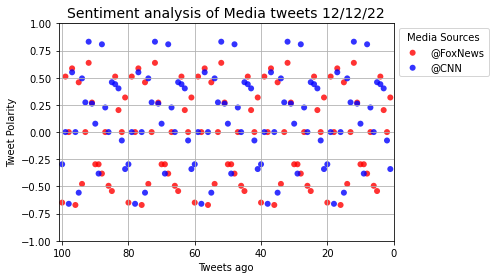

most positive-popular 0.12549500000000002


,Compound,Positive,Negative,Neutral,Tweets Ago
Media,,,,,
@CNN,0.125495,0.0,0.0,1.0,50.5
@FoxNews,-0.015605,0.0,0.0,1.0,50.5


In [ ]:
from matplotlib import pyplot as plt
for media in news_sources:
  m_df = sentiments_df[sentiments_df['Media']==media]
  plt.scatter(m_df['Tweets Ago'], m_df['Compound'], 
              marker = 'o', linewidth=0, alpha=0.8, label=media, 
              facecolors=m_df['Media'].map({
                  '@FoxNews': 'red', '@CNN': 'blue'
                  }))
#'@FoxNews': 'red', '@CNN':'blue','@CBSNews': 'green',
#'@BBC': 'pink', '@Time': 'purple'
                 
plt.legend(bbox_to_anchor=(1,1), title= 'Media Sources')
plt.title('Sentiment analysis of Media tweets %s' 
          %(time.strftime('%x')), fontsize=14)
plt.xlabel('Tweets ago')
plt.ylabel('Tweet Polarity')
plt.xlim(101, 0)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()
sentiments_df['Media'], sentiments_df['Compound']
sentiments__ = (sentiments_df.groupby('Media').mean()['Compound']) 
#print(sentiments__) 
print('most positive-popular', sentiments__[0])
sentiments_df.groupby('Media').mean()

Security libraries

In [ ]:
import string 
rotation = 3 
P = 'CALM' ; C = '' 
for letter in P:
  C = C + (chr(ord(letter) + rotation))
C

'FDOP'

In [ ]:
""" ROT13 """ 
import codecs
P = 'CALM' ; C=''
C = codecs.encode(P, 'rot_13')
C

'PNYZ'

In [ ]:
!pip install passlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 525 kB 4.3 MB/s 


In [ ]:
from hashlib import md5
""" algorithm with signature  
'md5', 'sha1', 'sha224', 'sha256', 'sha384', 'sha512'  """

string = 'myPassword' ; myHash = md5(string.encode()).hexdigest()
string, string.encode(), myHash

('myPassword', b'myPassword', 'deb1536f480475f7d593219aa1afd74c')

In [ ]:
import passlib
from passlib.hash import md5_crypt
myHash_ = md5_crypt.encrypt(string)
md5_crypt.verify(string, myHash), md5_crypt.verify('myPassword2', myHash_)

<ipython-input-86-8087bcd377d8>:3: DeprecationWarning: the method passlib.handlers.md5_crypt.md5_crypt.encrypt() is deprecated as of Passlib 1.7, and will be removed in Passlib 2.0, use .hash() instead.
  myHash = md5_crypt.encrypt(string)


(True, False)

In [ ]:
from passlib.hash import sha512_crypt
myHash__ = sha512_crypt.using(salt = 'qIo0foX5', rounds=5000).hash('myPassword')
""" salt: add random characters before hashing """ 
myHash__ 

'$6$qIo0foX5$a.RA/OyedLnLEnWovzqngCqhyy3EfqRtwacvWKsIoYSvYgRxCRetM3XSwrgMxwdPqZt4KfbXzCp6yNyxI5j6o/'

In [ ]:
!pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 4.8 MB/s 


In [ ]:
import cryptography as crypt  
from cryptography.fernet import Fernet

key_ = Fernet.generate_key()
file = open('keys.key', 'wb') ; file.write(key_)  ; file.close()
!cat keys.key
key_

S65KIVRsVoNPhW0wlsGnAbEqoo3uQv1JWk0KIgx2OS0=

b'S65KIVRsVoNPhW0wlsGnAbEqoo3uQv1JWk0KIgx2OS0='

In [ ]:
message_ = 'Palo Alto weather nice in December'
message_ = bytes(message_.encode('utf-8'))
f = Fernet(key_)
encrypted_ = f.encrypt(message_)
decrypted_ = f.decrypt(encrypted_)
encrypted_, decrypted_

(b'gAAAAABjknJbQa7lCVpZFqRpcSQL_G6yroMFbvfnb9AoVJi1eqeMkvGvbNHU_x50BcRvYP6jbAF-SWm8tsWzAepYKLNJNwb2-1TFzvthwv71ENxSu6qhv6mliXPJUMpoYzHEdHhNY990',
 b'Palo Alto weather nice in December')

In [ ]:
from xmlrpc.client import SafeTransport, ServerProxy
import ssl 
class CertVerify(SafeTransport):
  def __init__(self, cafile, certfile=None, keyfile=None):
    SafeTransport.__init__(self)
    self._ssl_context = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
    self._ssl_context.load_verify_locations(cafile)
    if cert:
      self._ssl_context.load_cert_chain(certfile, keyfile)
    self._ssl_context.verify_mode = ssl.CERT_REQUIRED
  
  def make_connection(self, host):
    s = super().make_connection((host, {'context': self._ssl_context}))
    return s 

""" create client proxy """ 
s = ServerProxy('https://', 
                transport=ssl.VERIFY_ALLOW_PROXY_CERTS('server_cert.pem'),
                allow_none = True) 


**Main Algorithms** used in:
- **Unsupervised ML**
    - Clustering, Dimensionality reduction, Anomaly detection, Association rules 
- **Traditional Supervised ML**:
    - Classifiers, Regressors 
- Neural Networks 
- Natural Language Processing 
- Recommendation Engines 


# Graphs

**Review**

*   Graphs - the basics 
*   Graph Search and its Applications
*   Dijkstra's Shortest-Path Algorithm
*   The heap Data Structure
*   Search Trees 
*   Hash Tables, Bloom Filters
*   Review of Asymptotic notation


In [ ]:
""" 
Graph G = (V, E) with vertex set V, and edge set E
n = |V| denoting the number of vertices and m =|E| the number of edges

Undirected: an edge with endpoints v and w, denoted by {v, w} or by {w, v} 
Directed: an edge with endpoints v and w, ordered pair (ordered edge traveling 
from v to w) with v the first vertex (tail) and the w the second vertex (head).

Applications: Road networks(maps), WWW, Social networks, Precedence constraints
Precedence constraints example is the topological ordering on following a directed
graph, in which there is one vertex for each edge (course schedule with prereqs).

"""
print()

In [ ]:
""" Challenge 
Consider an undirected graph with n vertices and no parallel edges. What is 
the minimum and maximum number of edges the graph can have
n -1 & n(n-1)/2 

1. n choices for the tail edge and n-1 for the head edge 
(example here would be trees structure with n-1 edges - adding a new edges fuses
the pieces containing its endpoints to a signle piece)
  A
  | \
  B__C

two connected undirected graphs with 4 vertices and 3 edges 
A__B__C__D      A
                |
                B
              /   \
            C       D

2. the maximum number of edges in a graph is achieved with complete graph with 
every possible edge possible n(n-1)/2
            n = 4   (4/2)3= 6
    A __ B
    | \/ |
    | /\ |
    C __ D

- Discuss Sparse vc. Dense Graph: distinction is important as they are different
data structure with different algorithm usage 
For an undirected graph with n vertices connected, the number of edges m is at
least linear in n (m=Omega(n)). If the graph has no parallel edges then the # of
edges m = O(n^2). We conclude that the number of edges in a 'connected' graph 
is somewhere between linear and quadratic # of vertices. 
Therefore a graph is 'sparse' if the number of edges is relatively closer to 
linear and dense if it is closer to the quadratic function. 
Graph with n vertices and O(nlog(n)) edges is considered sparse, and those with 
Omega(n^2/log(n)) are usually considered dense or partially dense like those 
with ~ n^(3/2) edges

"""
print()

In [ ]:
"""
Measuring the size of the Graph 
Specify exactlywhat the graph is, how it is represented and used in the running
function as the input (and input size). Two parameters that control the size of
the graph are the number of vertices and edges

Representing a Graph

There is more than one way to represent the graph, and we work primarily with 
the adjacency list (we can use adjacency matrix)
  1. an array containing the graph's vertices 
  2. an array containing the graph's edges
  3. for each edge, a pointer to each with its two endpoints
  3. for each vertes, a pointer to each of the incident edges

In terma of the data structure the adjacency list boils down to two arrays or
linked lists, one for keeping track of the vertices, and one for the edges. 
These two arrays cross reference each other with each edge associated with 
pointers to endpoints.

How much space for the adjacency list representation of the graph with 
n vertices and m edges.
Theta(n) or Theta(m) or Theta(m+n) or Theta(n^2) ? 
Theta(m+n) is the answer (revisit the proof- and Google PageRank algorithm)
Scorecard:
  vertex array                              Theta(n)
  edge array                                Theta(n)
  pointers from edges to endpoints          Theta(m)
+ pointers from vertices to incident edges  Theta(m)
______________________________________________________
  total                                     Theta(m+n) 
  (connected & w/o parallel edges ) 

G = (V, E) with n vertices and no parallel edges, label vertices 1,2,3, ..., n
Adjacency matrix nxn
A[ij] = {1 if edge (i,j) belongs to set E, otherwise 0}
                            1   2   3   4
                            _______________
                1      1    0   1   0   0
                |      2    1   0   1   1
                2      3    0   1   0   1
              /   \    4    0   1   1   0
             3 ___ 4
      A graph           Adjacency list (1 bit per vertex pair)

Add representation for
  - parallel edges: if multiple edges with same endpoints, the denote A[i,j]
  - weighted graphs: if each edge (i,j) has a weight representing a cost or a
    distance, then each eantry has an weight w(i,j)
  - directed graphs: each entry A(i,j) of Adjacency list as 
    A[ij] = {1 if edge (i,j) belongs to set E, otherwise 0}

How to best represent the graph - it depends - for instance on density -
compare the # of edges to the # of vertices, and encode in efficient way. 
It works for a dense graph and not so much for a sparse one however it is the 
recommended approach for use with many of the graph algorithms.

"""
print()

In [ ]:
""" problem set - concepts  

1. Graph with n vertices and no parallel edges. What is the max number of
edges.
  n(n-1)

2. Let G = (V, E) an undirected graph. By the degree of a vertex v pertains to
V, we mean the number of edges in E that are incident to v (v endpoint). What is
the sum of the degrees of all of G's vertices, as a function of n and m? 
  2m 
  each edge contributes exactly 1 to the degrees of 2 different endpoints

3. For each of the conditions on a graph G =(V,E) is the condition satisfied by
dense graphs, sparse graphs, or by both some sparse and some dense graphs. 
Assume the number of vertices is large ~ at least 10k. 
  a) at least one vertex of G has degree at most 10 
  b) every vertex of G has degree at most 10 
  c) at least one vertex of G has degree n -1
  d) every vertex of G has degree n -1 

  a) & c) satisfied by some sparse graph (like star graph), and some dense graphs
  (such as complete graph with an extra edge - gued on)
  b) satisfied by sparse graphs
  d) satisfied by dense graphs

4. Consider an undirected graph G = (V,E) represented with A(i,j) matrix 
Given v pertinant to V, how many operations are required to identify the edges
incident to v? Let k denote the number of such edges 
  Scan through the row corresponding to v, k = Theta(n)

5. Consider a directed graph G = (V, E) that is represented with adjacency 
lists (matrix), except with each vertex storing only an array of its outgoing 
edges (not incoming edges). Given a vertex v pertinant to V, how many operations
are required to identify the incoming edges? 
  Scan through the edge array, k = Theta(m)

""" 

# Graph Search and its Applications

In [ ]:
""" Fundamental primitives for Graph Search and applications

Compute the strongly connected components of a directed graph with only two
passes of depth-first-search
Application: Checking connectivity, Shortest path computation, Planning for 
reaching a goal state from an initial state 
Complexity: Algorithms blazingly fast, run in just O(m+m) with constant factor.

Problem Graph Search: 
Input is an undirected or directed graph G = (V,E) & a starting vertex s in V.
Goal is to identify the vertices of V reachable from s in G
Lemma/Proposition on Generic Graph Search 

Generic Search
Postcondition: a vertex is reachable from s if and only if it marked as explored
________________
mark as explored, all other vertices as unexplored 
while there is an edge (v,w) in E with v explored
  and w unexplored do 
    choose some such edge (v,w)   // underspecified 
    mark w as explored 

1. BFS implementation in linear time using a queue data structure 
2. BFS to compute in linear time the length of a shortest path between one vertex 
and all other vertices, layer-i vertices being precisely at distance i from s 
3. DFS agressive strategy for exploring graph in linear time, using recursion
4. DFS to compute in linear time, a topological order of the vertices of a 
directed graph, a useful primitive for sequencing problems
5. DFS to compute in linear time, the strongly connected components of a 
directed graph - useful in applications with the structure of graph

BFS Search
Postcondition: a vertex is reachable from s if and only if it marked as explored
________________
mark as explored, all other vertices as unexplored 
Q: a queue data structure initialized with s
while Q is not empty do
  remove the vertex from the front of Q, call it v
  for each edge (v,w) in v's adjacency list do
    if w unexplored then 
      mark w as explored
      add w to the end of Q
"""
print()

**Implement a Graph**
- Is it directed? implement both
- Do the edges have weights? Yes 
- Can the graph have cyscles? Yes 
- If we try to add a node that already exists, do we just do nothing?
- If we try to delete a node that doesnt exist, do we just do nothing 
- Can we assume this is a connected graph? Yes 
- Can we assume all inputs are valid? Yes 
- Can we assume this fits the memory? Yes 

Input:
- add_edge(source, destination, weight)
- graph.add_edge(0, 1, 5) 
- graph.add_edge(0, 5, 2) 
- graph.add_edge(1, 2, 3)  
- graph.add_edge(2, 3, 4) 
- graph.add_edge(3, 4, 5) 
- graph.add_edge(3, 5, 6)
- graph.add_edge(4, 0, 7) 
- graph.add_edge(5, 4, 8) 
- graph.add_edge(5, 2, 9)

Result:
- source and destination nodes within graph are connected with specified weight
- the Graph class can be used as a building block for more complex graphs

(challenges)

**Algorithm (what it should do):**

**Node - steps**
1. Node will keep track of Id, visit state, incoming edge count 
(used in topological sort), adjacent nodes and edge weights 
2. Add_neighbor - if the neighbor doesn't already exist as an adjacent node;
update the adjacent nodes with edge weights; 
increment count if neighbor's incoming edge
Implement with complexity Time O(1) and Space O(1)

**Graph - steps**
1. Graph will keep tradk of its nodes 
2. add_node - if node exists return it, create a node with given id, add the newly node to the collection nodes. Keep Complexity for Time O(1), Space O(1)
3. add_edge - If the source node is not the collection of nodes, add it; if the destination is not in the collection add it; Add a connection from the source node to the destination node with the given edge weight 
4. add_undirected_edge - call add_edge, and also add a connection from the destination node to the source node with the given edge weight. Keep the complexity for Time O(1), Space O(1)

In [ ]:
from enum import Enum
class State(Enum): 
  unvisited = 0
  visiting = 1 
  visited = 2 

""" class Node """
class Node:
  def __init__(self, key): 
    self.key = key 
    self.visit_state= State.unvisited
    self.incoming_edges = 0 
    self.adj_nodes = {}   # dictionary key, value nodes
    self.adj_weights = {} # dictionary key, value nodes
  
  def __repr__(self):
    return str(self.key)
  def __lt__(self, other):
    return self.key < other.key 

  def add_neighbor(self, neighbor, weight=0):
    if neighbor is None or weight is None: 
      raise TypeError('neighbor or weight cannot be none')
    neighbor.incoming_edges += 1 
    self.adj_weights[neighbor.key] = weight 
    self.adj_nodes[neighbor.key] = neighbor

  def remove_neighbor(self, neighbor): 
    if neighbor is None: 
      raise TypeError('neighbor or weight cannot be none')   
    if neighbor.key not in self.adj_nodes:
      raise KeyError('neighbor not found')
    neighbor.incoming_edges -= 1 
    del self.adj_weights[neighbor.key]
    del self.adj_nodes[neighbor.key]

""" class Graph """ 
class Graph: 
  def __init__(self):
    self.nodes = {}
  
  def add_node(self, key):
    if key is None:
      raise TypeError('key cannot be none')
    if key not in self.nodes:
      self.nodes[key] = Node(key)
    return self.nodes[key]
  
  def add_edge(self, source_key, dest_key, weight=0):
    if source_key is None or dest_key is None:
      raise KeyError('Invalid key')
    if source_key not in self.nodes: 
      self.add_node(source_key)
    if dest_key not in self.nodes:
      self.add_node(dest_key)
    self.nodes[source_key].add_neighbor(self.nodes[dest_key], weight)
  
  def add_undirected_edge(self, source_key, dest_key, weight=0):
    if source_key is None and dest_key is None:
      raise TypeError('key cannot be none')
    self.add_edge(source_key, dest_key, weight)
    self.add_wedge(dest_key, source_key, weight)

""" create Graph """
def create_graph():
  graph = Graph()
  for key in range(0, 6):
    graph.add_node(key)
  return graph

graph_ = create_graph()
#print(graph_.__repr__())
#print(graph_.nodes)
graph_.add_edge(0, 1, weight=5) 
graph_.add_edge(0, 2, weight=5) 
graph_.add_edge(0, 5, weight=2) 
graph_.add_edge(1, 2, weight=3)  
graph_.add_edge(2, 3, weight=4) 
graph_.add_edge(3, 4, weight=5) 
graph_.add_edge(3, 5, weight=6)
graph_.add_edge(4, 0, weight=7) 
graph_.add_edge(5, 4, weight=8) 
graph_.add_edge(5, 2, weight=9)

print(graph_.nodes[0].adj_nodes[graph_.nodes[1].key], 
      graph_.nodes[0].adj_weights[graph_.nodes[1].key])
print(graph_.nodes[0].adj_nodes[graph_.nodes[5].key], 
      graph_.nodes[0].adj_weights[graph_.nodes[5].key])
print(graph_.nodes[1].adj_nodes[graph_.nodes[2].key],
      graph_.nodes[1].adj_weights[graph_.nodes[2].key])

graph_.nodes[5].incoming_edges
graph_.nodes[0].remove_neighbor(graph_.nodes[2])

1 5
5 2
2 3


**Define Graph - simple implementation**

- Graph denoted as G = (V,E) 
- Graph has a vertex set V (V= [1,2,3,4,5,6]) 
- The Edge set E is [[1,2],[1,5],[2,3],[2,5],[3,4],[4,5],[4,6]]
- Path is a graph G = (V,E) is a sequence of vertices v1, v2, ... , vk with the 
property that there are edges between vi and v1 +1.  Path goes from v1 -> vk
The sequence 6,4,5,1,2 defines a path from node 6 to node 2.
Similarly other paths can be created by traversing the edges of the graph.
- A path is simple if the vertices are all different

Cycle is a path v1, v2, ..., vk for which
  1. k>2 
  2. the first k-1 vertices are all different, and 
  3. v1 = vk 
the sequence 4, 5, 2, 3, 4 is a cycle 
- A path is connected if for every pair (u, v) of vertices u and v, there is a
path from u to v. 
-  The Graph class has two data members, the total number of vertices, and
a list of adjacent vertices. 

In [ ]:
"""
Graph denoted as G = (V,E) 
Graph has a vertex set V (V= [1,2,3,4,5,6]) 
The Edge set E is [[1,2],[1,5],[2,3],[2,5],[3,4],[4,5],[4,6]]
[6]
  \
  [4] -----[5]
    |      | \
    |      | [1]
    |      | / 
  [[3]] -- [[2]]
"""


class AdjNode: 
  """ represent the adjacency list of the node """
  def __init__(self, data):
    self.vertex = data 
    self.next = None 

class Graph_s:
  """ represent the Graph class """ 
  def __init__(self, vertices):
    self.V = vertices 
    self.graph = [None] * self.V
  
  """ method to add an edge in an unidrected graph """ 
  def add_edge(self, source, destination):
    """ add edge source and destination vertex """ 
    node = AdjNode(destination)
    node.next = self.graph[source]
    self.graph[source] = node 
    """ intentionally comment these lines if undirected graph """ 
    """ 
    node = AdjNode(source)
    node.next = self.graph[destination]
    self.graph[destination] = node     """

  """ method to print the graph """ 
  def print_graph(self): 
    for i in range(self.V): 
      print('Adjacency list of vertex {} \n head'.format(i), end='')
      tmp = self.graph[i]
      while tmp:
        print(' -> {} '.format(tmp.vertex), end='')
        tmp = tmp.next 
      print(' \n ')

V = 6 # total vertices
graph_ = Graph_s(V)
graph_.add_edge(1,2)
graph_.add_edge(1,5)
graph_.add_edge(2,3)
graph_.add_edge(2,5)
graph_.add_edge(3,4)
graph_.add_edge(4,5)
graph_.add_edge(4,6)

graph_.print_graph()

Adjacency list of vertex 0 
 head 
 
Adjacency list of vertex 1 
 head -> 5  -> 2  
 
Adjacency list of vertex 2 
 head -> 5  -> 3  
 
Adjacency list of vertex 3 
 head -> 4  
 
Adjacency list of vertex 4 
 head -> 6  -> 5  
 
Adjacency list of vertex 5 
 head 
 


**Find the shortest path between two nodes in a graph**

- Is the Graph directional? Yes
- Could the graph have cycles? Yes. If No, is DAG - solve with topological sort
- Are the edges weighted? Yes. If edges are not weighted, use BFS 
- Are the edges all non-negative numbers? Yes. 
  - Graphs with negative edges can be done with Bellman-Ford 
  - Graphs with negative cost cycles do not have a defined shortest path 
- Do we have to check for non-negative edges? No 
- Assume this is a connected graph? Yes 
- Assume all inputs are valid? No 
- Assume we already have a graph class? Yes 
- Assume we already have a priority queue class? Yes 
- Assume this fits the memory? Yes 
- The constraint is that we don't have to check for negtive edges -test general 

Input
- graph.add_edge('a', 'b', weight =5)
- graph.add_edge('a', 'c', weight =3)
- graph.add_edge('a', 'e', weight =2)
- graph.add_edge('b', 'd', weight =2)
- graph.add_edge('c', 'b', weight =1)
- graph.add_edge('c', 'd', weight =1)
- graph.add_edge('d', 'a', weight =1)
- graph.add_edge('d', 'g', weight =2)
- graph.add_edge('d', 'h', weight =1)
- graph.add_edge('e', 'a', weight =1)
- graph.add_edge('e', 'h', weight =4)
- graph.add_edge('e', 'i', weight =7)
- graph.add_edge('f', 'b', weight =3)
- graph.add_edge('f', 'g', weight =1)
- graph.add_edge('g', 'c', weight =3)
- graph.add_edge('g', 'i', weight =2)
- graph.add_edge('h', 'c', weight =2)
- graph.add_edge('h', 'f', weight =2)
- graph.add_edge('h', 'g', weight =2)

- shortest_path = ShortestPath(graph)
- result = shortest_path.find_shortest_path('a', 'i')

**Algorithm**

- Initialize the following:
  - Set each node's previous node key to None: previous = {}
  - Set each node's shortest path weight to inf: path_weight = {}
  - Add each node's shortest pah weight to the priority queue: remaining=PQ()
- Set the start node's path_weight to 0 and update the value in remaining 
- Loop while remaining still has items 
  - Extract the min node (node with minimum path weight) from remaining
  - loop through each adjacent node in the min node
    - calculate the new weight: adjacent node's edge weight + min node's path_weight 
    - if the newly calculated path is less than the adjacent node's current path weight 
       - set the node's previous node key leading to the shortest path 
       - update the adjacent node's shortest path and update the value in the priority queue 
- Walk backwards to determine the shortest path 
  - start at the end node, walk the previous dict to get to the start node
- Reverse the list and return it 

**Complexity for array-based priority-queue**
- Time O(v^2) where v is the number of vertices
- Space: O(v^2) 
If the graph has a lot of edges, it is better with min-based pq
- O(v^2) is better than O((v+v^2)log(v))

**Complexity for min-heap-based priority queue**
- Time O((v+e)log(v)) where v is the number of vertices, e number of edges
- Space O((v+e)log(v))
This is better than the array variant if the graph is sparse 


In [ ]:
""" import priority queue class """ 
""" import graph base implementation class """
""" implement ShortestPath class 
    with initialization and find_shortest_path """ 

' implement ShortestPath class \n    with initialization and find_shortest_path '

In [ ]:
import sys 
class PriorityQueueMode(object):
  def __init__(self, obj, key):
    self.obj = obj 
    self.key = key 
  
  def __repr__(self):
    return str(self.obj) + ': ' + str(self.key)

class PriorityQueue(object):
  def __init__(self):
    self.queue = []

  def __len__(self):
    return len(self.queue)
  
  def insert(self, node):
    if node is not None:
      self.queue.append(node)
      return self.queue[-1]
    return None
  
  def extract_min(self):
    if not self.queue: 
      return None 
    minimum = sys.maxsize
    minimum_index = 0
    for index, node in enumerate(self.queue):
      if node.key < minimum:
        minimum = node.key 
        minimum_index = index 
    return self.queue.pop(minimum_index)
  
  def decrease_key(self, obj, new_key):
    for node in self.queue:
      if node.obj is obj:
        node.key = new_key 
        return node 
    return None 

""" test priority queue """
priority_queue = PriorityQueue()
print(priority_queue, priority_queue.extract_min())
priority_queue.insert(PriorityQueueMode('a', 20))
print(priority_queue.extract_min())
priority_queue.insert(PriorityQueueMode('b', 5))
priority_queue.insert(PriorityQueueMode('c', 15))
priority_queue.insert(PriorityQueueMode('d', 22))
priority_queue.insert(PriorityQueueMode('e', 40))
priority_queue.insert(PriorityQueueMode('f', 3))
priority_queue.decrease_key('f', 2)
priority_queue.decrease_key('a', 19)
mins = []
while priority_queue.queue:
  mins.append(priority_queue.extract_min())
mins


<__main__.PriorityQueue object at 0x7fe3800ab0d0> None
a: 20


[f: 2, b: 5, c: 15, d: 22, e: 40]

In [ ]:
class ShortestPath(object):
  def __init__(self, graph):
    if graph is None: 
      raise TypeError('graph cannot be None')
    self.graph = graph
    self.previous = {}    # key/val previous node list 
    self.path_weight = {} # key/val weight shortest path 
    self.remaining = PriorityQueue()  # Queue of node key, path weight 
    for key in self.graph.nodes.keys():
      # set each node's previous node key to None 
      # set each node's shortest path weight to inf 
      # add each node's shortest path weight to the priority queue 
      self.previous[key] = None
      self.path_weight[key] = sys.maxsize 
      self.remaining.insert(
          PriorityQueueMode(key, self.path_weight[key]))
    
  def find_shortest_path(self, start_node_key, end_node_key):
    if start_node_key is None or end_node_key is None:
      raise TypeError('Input node keys cannot be None')
    if (start_node_key not in self.graph.nodes or 
          end_node_key not in self.graph.nodes): 
      raise ValueError('Invalid start or end node key')
    # set the start node's shortest path weight to 0 
    # and update the value in the priority queue 
    self.path_weight[start_node_key] = 0 
    self.remaining.decrease_key(start_node_key, 0)
    while self.remaining: 
      # extract the min node (node with minimum path weight) 
      # from the priority queue 
      min_node_key = self.remaining.extract_min().obj 
      min_node = self.graph.nodes[min_node_key]
      # loop through each adjacent node in the min node 
      for adj_key in min_node.adj_nodes.keys():
        # node's path 
        # adjacent node's edge weight + the min node's shortest path weight 
        new_weight = (min_node.adj_weights[adj_key] + 
            self.path_weight[min_node_key])
        # only update if the newly calculated path is 
        # less than existing node's shortest path 
        if self.path_weight[adj_key] > new_weight:
          # set the node previous node key to the shortest path
          # update the adjacent node's shortest path 
          # update the value in the priority queue 
          self.previous[adj_key] = min_node_key 
          self.path_weight[adj_key] = new_weight 
          self.remaining.decrease_key(adj_key, new_weight)
    # walk backward to determine the shortest path
    # start at the end node, walk the previous dict to get to start node 
    result = []
    current_node_key = end_node_key 
    while current_node_key is not None:
        result.append(current_node_key)
        current_node_key = self.previous[current_node_key]
    # reverse the list 
    return result[::-1]

In [ ]:
""" test the shortest_path algorithm """
graph__ = Graph()
graph__.add_edge('a', 'b', weight=5)
graph__.add_edge('a', 'c', weight=3)
graph__.add_edge('a', 'e', weight=2)
graph__.add_edge('b', 'd', weight=2)
graph__.add_edge('c', 'b', weight=1)
graph__.add_edge('c', 'd', weight=1)
graph__.add_edge('d', 'a', weight=1)
graph__.add_edge('d', 'g', weight=2)
graph__.add_edge('d', 'h', weight=1)
graph__.add_edge('e', 'a', weight=1)
graph__.add_edge('e', 'h', weight=4)
graph__.add_edge('e', 'i', weight=7)
graph__.add_edge('f', 'b', weight=3)
graph__.add_edge('f', 'g', weight=1)
graph__.add_edge('g', 'c', weight=3)
graph__.add_edge('g', 'i', weight=2)
graph__.add_edge('h', 'c', weight=2)
graph__.add_edge('h', 'f', weight=2)
graph__.add_edge('h', 'g', weight=2)

shortest_path = ShortestPath(graph__)
result = shortest_path.find_shortest_path('a', 'i')
result, shortest_path.path_weight['i']

(['a', 'c', 'd', 'g', 'i'], 8)

**Graph Shortest Path Unweighted**
- Constraints 
  - Graph directed - weighted - connected - valid inputs - fits the memory 
  - Graph has Graph and node classes 
  - Input two nodes 
  - Output a list of Node keys that make up the shortest path 
  - If there is no path return None 

- Inputs 
  - add_edge(source, destination, weight) - weight defaults to zero 
  - graph.add_edge(0, 1)
  - graph.add_edge(0, 4)
  - graph.add_edge(0, 5)
  - graph.add_edge(1, 3)
  - graph.add_edge(1, 4)
  - graph.add_edge(2, 1)
  - graph.add_edge(3, 2)  
  - graph.add_edge(3, 4)

- Result 
  - search_path(start=0, end=2) -> [0,1,3,2] 
  - search_path(start=0, end=0) -> [0]
  - search_path(start=4, end=5) -> None

- Algorithm 
  To determine shortest path in an 'unweighted' graph, we can use BFS search
    by keeping track of the previous nodes ids for each node. 
    Previous nodes ids can be a dictionary {} of: 
      - key current node id, and value previous node id
  - If start node is the end node return True 
  - Add the start node to the queue and mark it as visited 
    - update the previous node ids, previous node is of the start node is None
  - While queue is not empty 
    - dequeue a node and visit it 
    - if the node is the end node, return the previous nodes 
    - set the previous node to the current node 
    - iterate through each adjacent node 
      - if the node has not been visited, add it to the queue and mark it as visited - update previous node ids
  - Return None (default unless changed in the while loop) 
  - Walk the previous node ids backwards to get the path 

- **Template in general for UCC (Unweighted Connected Components)**
  - Input: G = (V,E) with Adjacency list representation, with V={1,2,3,...,n)
  - mark all vertices as unexplored 
  - numCC = 0
  - For i in range(1,n) do: // try all vertices 
    - if i is unexplored then   // avoid redundancy 
      - nummCC ++ // new component 
      - // call BFS at i 
      - Q: a queue data structure, initialized with i 
      - while Q is not empty do
        - remove the vertex from the Q, call it v 
        - cc(v) = nummCC
        - for each (v,w) in v's adjacency list do
          - if w is unexplored
            - mark w as explored 
            - add w to the end of the Q 
  
- Complexity 
  - Time O(V + E) where V equal the number of vertices and E number of edges 
  - Space O(V + E)

Applications:
  - Detecting network failures, Clustering, Data Visualization

In [ ]:
from collections import deque 

class GraphShortestPathUnweighted(Graph):

  def shortest_path(self, source_key, dest_key):
    if source_key is None or dest_key is None:
      return None 
    if source_key is dest_key:
      return [source_key]
    prev_node_keys = self._shortest_path(source_key, dest_key)
    if prev_node_keys is None:
      return None 
    else: 
      path_ids = [dest_key]
      prev_node_key = prev_node_keys[dest_key]
      while prev_node_key is not None:
        path_ids.append(prev_node_key)
        prev_node_key = prev_node_keys[prev_node_key]
      return path_ids[::-1]

  def _shortest_path(self, source_key, dest_key):
    queue = deque()
    queue.append(self.nodes[source_key])
    prev_node_keys = {source_key: None}
    self.nodes[source_key].visit_state = State.visited
    while queue:
      node = queue.popleft()
      if node.key is dest_key:
        return prev_node_keys 
      prev_node = node 
      for adj_node in node.adj_nodes.values():
        if adj_node.visit_state == State.unvisited:
          queue.append(adj_node)
          prev_node_keys[adj_node.key] = prev_node.key 
          adj_node.visit_state = State.visited 
    return None 

nodes = []
graph_u = GraphShortestPathUnweighted()
for id in range(0, 6):
  nodes.append(graph_u.add_node(id))
graph_u.add_edge(0, 1)
graph_u.add_edge(0, 4)
graph_u.add_edge(0, 5)
graph_u.add_edge(1, 3)
graph_u.add_edge(1, 4)
graph_u.add_edge(2, 1)
graph_u.add_edge(3, 2)
graph_u.add_edge(3, 4)
print(graph_u.shortest_path(nodes[0].key, nodes[2].key))
print(graph_u.shortest_path(nodes[0].key, nodes[0].key))
print(graph_u.shortest_path(nodes[4].key, nodes[5].key))

[0, 1, 3, 2]
[0]
None


**Graph Path Exists**

- Determine whether there is a path between two nodes in a graph
- Assumptions: 
  - Graph directed
  - Already have Graph and Node classes
  - It is a connected graph
  - Inputs are valid
  - It fits the memory 
- Inputs
  - graph.add_edge(source, destination, weight)
  - graph.add_edge(0, 1, 5)
  - graph.add_edge(0, 4, 3)
  - graph.add_edge(0, 5, 2)
  - graph.add_edge(1, 3, 5)
  - graph.add_edge(1, 4, 4)
  - graph.add_edge(2, 1, 6)
  - graph.add_edge(3, 2, 7)
  - graph.add_edge(3, 4, 8)
- Result
  - search_path(start, end) 
- Algorithm 
  - Use either BFS or DFS to determine if there is a path 
  - BFS can also be used to determine the shortest path. DFS is easier with 
  straight recursion but often results in longer path 
  - Solution with BFS approach:
      - Add the start node to the queue and mark it as visited 
      - If the start node is the end node, return True 
      - while the queue is not empty: 
          - Dequeue a node and visit it 
          - If the node is the end node, return True 
          - Iterate through each adjacent node 
              - if the node unvisited, add it to the queue and mark as visited
      - return (default False - condition changes in the loop - queue iteration
- Complexity is linear Time O(V+E), Space O(V+E)

In [ ]:
from collections import deque 

class GraphPathExists(Graph): 

  def path_exists(self, start, end):
    if start is None or end is None:
      return False 
    if start is end:
      return True 
    queue = deque()
    queue.append(start)
    start.visit_state = State.visited
    while queue:
      node = queue.popleft()
      if node is end:
        return True 
      for adj_node in node.adj_nodes.values():
        if adj_node.visit_state == State.unvisited:
          queue.append(adj_node)
          adj_node.visit_state = State.visited
    return False 

graph___ = GraphPathExists()
nodes = []
for id in range(0, 6): 
  nodes.append(graph___.add_node(id))

graph___.add_edge(0, 1, 5)
graph___.add_edge(0, 4, 3)
graph___.add_edge(0, 5, 2)
graph___.add_edge(1, 3, 5)
graph___.add_edge(1, 4, 4)
graph___.add_edge(2, 1, 6)
graph___.add_edge(3, 2, 7)
graph___.add_edge(3, 4, 8)

graph___.path_exists(nodes[0], nodes[2]), \
graph___.path_exists(nodes[0], nodes[0]), \
graph___.path_exists(nodes[4], nodes[5]), \
graph___.path_exists(nodes[3], nodes[5])

(True, True, False, False)

**Graph BFS Traversal**
Same requirements and assumptions as above 
- Use BFS to determine the shortest path

- Algorithm:
  - add current node to the queue and mark as visited 
  - while queue (is not empty) 
      - 1) dequeue a node and visit it 
      - 2)iterate through adjacent nodes, if not visited - add it & mark as visited 

Complexity:
  - Time O(V+E), V - number of vertices, E - number of edges 
  - Space O(V) 
  - If number of vertices in the graph is known ahead of time, we can reduce the complexity based on the data structures that we use to determine which vertices have already been used 
  - If Graph is represented as Adjacency list it occupies O(V+E) space in memory
  - If Graph is represented as Adjacency matrix, it occupies O(V^2) space 

In [ ]:
from collections import deque 

class GraphBfs(Graph): 
  def bfs(self, root, visit_functionality):
    if root is None:
      return  
    queue = deque()
    queue.append(root)
    root.visit_state = State.visited
    while queue:
      node = queue.popleft()
      visit_functionality(node)
      for adj_node in node.adj_nodes.values():
        if adj_node.visit_state == State.unvisited:
          queue.append(adj_node)
          adj_node.visit_state = State.visited

nodes = []
results = []
graph_b = GraphBfs()
for id in range(0, 6):
  nodes.append(graph_b.add_node(id))

graph_b.add_edge(0, 1, 5)
graph_b.add_edge(0, 4, 3)
graph_b.add_edge(0, 5, 2)
graph_b.add_edge(1, 3, 5)
graph_b.add_edge(1, 4, 4)
graph_b.add_edge(2, 1, 6)
graph_b.add_edge(3, 2, 7)
graph_b.add_edge(3, 4, 8)
#graph_b.bfs(nodes[0], print)
graph_b.bfs(nodes[0], results.append)
results

[0, 1, 4, 5, 3, 2]

**Graph DFS Traversal**

- Requirements and Assumptions same as above 
- Algorithm:
  - If we want to visit every node in a graph we use DFS 
  - Visit current node and mark it as visited
  - Iterate through each adjacent node
    - If the node has not been visited, call dfs on it 

- Template: 
  - Input: G = (V,E)
  - Postcondition: a vertex is reachable from s if and only if marked as explored
  - // all vertices unexplored before the outer call 
  - **Recursive**
  - mark s as explored
  - for each edge (s,v) in s's adjacent list:
      - if v is unexplored then 
        - DFS(G,v)
  - **Iterative Version**
  - mark all vertices as unexplored 
  - S: - a stack data structure initialzed with s 
  - while S is not empty do 
    - remove (pop) the vertex v from the front of the stack S
    - if v is unexplored then 
      - mark v as explored 
      - for each edge (v,w) in v's adjacency list do
        - add (push) w to the front of S

- Complexity:
  - Time O(E+V)
  - Space O(V), for the recursion depth 

In [ ]:
class GraphDfs(Graph):
  def dfs(self, root, visit_functionality):
    if root is None:
      return 
    visit_functionality(root)
    root.visit_state = State.visited 
    for node in root.adj_nodes.values():
      if node.visit_state == State.unvisited:
        self.dfs(node, visit_functionality) # recursion

nodes = []
results = []
graph_d = GraphDfs()
for id in range(0, 6):
  nodes.append(graph_d.add_node(id))

graph_d.add_edge(0, 1, 5)
graph_d.add_edge(0, 4, 3)
graph_d.add_edge(0, 5, 2)
graph_d.add_edge(1, 3, 5)
graph_d.add_edge(1, 4, 4)
graph_d.add_edge(2, 1, 6)
graph_d.add_edge(3, 2, 7)
graph_d.add_edge(3, 4, 8)
#graph_b.bfs(nodes[0], print)
graph_d.dfs(nodes[0], results.append)
results

[0, 1, 3, 2, 4, 5]

**Topological sort or ordering**

- Applications: Sequencing tasks so that all precedence constraints are met 
- Let G = (V,E) be a directed graph. A topological ordering of G is an assignment f(v) of every vertex v pertinant to V to a different number, such that: for every (v,w) pertinant to E, f(v) < f(w)
- Theorem: Every DAG has a topological ordering, at least one
- Lemma: Every DAG has a source, at least one source vertex 
- Input: DAG graph G = (V,E) in adjacency list representation 
- Output: A topological ordering of the vertices of G 
- Topological sort via DFS 



**Pseudocode for Kosaraju topological sorting**
- 1. let G denote the input graph G with direction of every edge reversed
- 2. call DFS from every vertex of G', processed in arbitrary order, to compute a position f(v) for each vertex v 
- 3. call DFS from every vertex of G', processed from highest to lowest position, to compute identity of each vertex's connected component 

- G' is G with all edges reversed 
- mark all vertices of G' as unexplored 
- first pass DFS - compute f(v)'s TopoSort(G')
- second pass of DFS finds SCCs in reverse topological order 
- mark all vertices of G as unexplored
- nummSCC = 0
- for each v in V, in increasing order of f(v) do:
  - if v unexplored then
    - numSCC ++
    - // assign scc-values 
    - DFS-SCC(G,v)
  
- DFS-SCC
- mark s as explored
- scc(s) = numSCC 
- for each edge (s,v) in s's outgoing adjacency list do 
- if v is unexplored then
  - DFS-SCC(G,v)


In [ ]:
"""
Definitions
Topological Sort of directed graph ia a linear ordering of vertices such that 
for every directed edge (U, V) from vertex to vertex U comes before V. 

Example1: [[3,2], [3,0], [2,0], [2,1]]
Vertices: 4
Edges: [3,2], [3,0], [2,0], [2,1]
valid sort for the given graph
(3,2) - (2, 1) and (3, 2) and (2,0)
|
(3,0) 
    3
    | \ 2
    | / \
    0    1
Example2: [[4,2], [4,3], [2,0], [2,1], [3,1]]
Example3: [[6,4], [6,2], [5,3], [5,4], [3,0], [3,1], [3,2], [4,1]]

Topological ordering only possible with DAG
Algorithm: 
  - Traverse the graph in BFS
  - Save all sources in a sorted list 
  - Remove all sources and edges from the graph until all vertices are visited

Initialization
Build the graph and find-in-degrees of all vertices
Find all sources - store them in queue structure 
Sort the sources list

edges = [[3, 2], [3, 0], [2, 0], [2, 1]]
vertices = 4

1. Initialize the graph
inDegree = {0: 0, 1: 0, 2: 0, 3: 0}
graph = {0: [], 1: [], 2: [], 3: []}

2. Build the graph
Parent	Child
------------------
3		  2	append[key=3]-2
3 		0	append[key=3]-0
2 		0	append[key=2]-0
2 		1	append[key=2]-1

graph = {0: [], 1: [], 2: [0, 1], 3: [2, 0]}
inDegree = {0: 2, 1: 1, 2: 1, 3: 0}

3. Find all sources
sources = deque([3])

4. For each source, add it to the sortedOrder 
and subtract one from all of its children's in-degrees
# if a child's in-degree becomes zero, add it to the sources queue
sorted_order = [3, 2, 0, 1]

Total complexity is O(E+V) where E is the number of edges, and V of vertices
"""
print()

In [ ]:
""" topological sorting 'previous' implementation """ 
# Toplogical Sort DAG (Stubs -code)
from collections import deque

def topological_sort(vertices, edges):
  sortedOrder = []
  if vertices <= 0:
    return sortedOrder

  # a. Initialize the graph
  inDegree = {i: 0 for i in range(vertices)}  # count of incoming edges
  graph = {i: [] for i in range(vertices)}  # adjacency list graph
  #print(inDegree)
  #print(graph)

  # b. Build the graph
  for edge in edges:f
    parent, child = edge[0], edge[1]
    print(parent, child)
    graph[parent].append(child)  # put the child into it's parent's list
    inDegree[child] += 1  # increment child's inDegree

  #print(inDegree)
  #print(graph)

  # c. Find all sources i.e., all vertices with 0 in-degrees
  sources = deque()
  for key in inDegree:
    if inDegree[key] == 0:
      sources.append(key)
  #print(sources)

  # d. For each source, add it to the sortedOrder and subtract one from 
  # all of its children's in-degrees
  # if a child's in-degree becomes zero, add it to the sources queue
  while sources:
    vertex = sources.popleft()
    sortedOrder.append(vertex)
    # get the node's children to decrement their in-degrees
    for child in graph[vertex]:  
      inDegree[child] -= 1
      if inDegree[child] == 0:
        sources.append(child)

  print(sortedOrder)

  # topological sort is not possible as the graph has a cycle
  if len(sortedOrder) != vertices:
    return []

  return sortedOrder

# The Heap Data Structure

(recap)

- Heap DS facilitates the fast minimum and maximum operations/computations
- Operations: Insert, ExtractMin to remove and return an object with the smallest key, FindMin, Heapify given an array with objects-crate a heap to contain them 
- Runtime: Insert O(log(n)), ExtractMin O(log(n)), FinMin O(1), Heapify O(n), Delete O(log(n))
- Applications: Sorting an array in arbitrary order from smallest to largest 
- Replacement for Selection sort that for scanning takes longer with O(n^2)
- HeapSort running time is O(nlog(n))



In [ ]:
""" Min Heap 

Implement a min hear with ectract min, and insert methods 
Constraints
- All inputs are integers and we assume this fits the memory 

Test cases:
 - extract min of an empty tree 
 - extract min general case 
 - insert into an empty tree 
 - insert general case (left and right insert)
   __5__ 
   /    \
  20    15  
 / \    / \
22  40 25

extract_min(): 5        insert(2)
   __15__                 __2__ 
   /    \                 /    \
  20    25               20    5  
 / \    / \             / \    / \
22  40                 22  40 25  15

Steps for extract_min: 1) save the root value to be returned - that is 5
2) move the right most element to the root - 25 3) bubble down 25, swap 15 w/15 
as value 15 is the smaller child 4) return 5 

Steps for insert: 1) insert the value 2 at the right most spot to maintain the 
heap property 2) swap 2 with 15 to maintain the property 3) swap 2 with 5
Use array to represent the indices. To get to a parent take (index -1)/2

A Heap is a complete binary tree that satisfies the criteria in which each node
is smaller than its children. W use array DS to represent the tree with indices.
To get to a child we take 2 index + 1 (left child) or 2 index + 2 (right child).
example - the right child of index1 is 2*1 + 2 = 4 
   __0__  [indices]
   /    \
  1      2  
 / \    / \
3   4 

Time O(log(n)), Space O(log(n)) for the recursion depth (tree height)
or O(1) using an iterative approach 
"""
import sys 

class MinHeap():

  def __init__(self):
    self.array = []
  
  def __len__(self):
    return len(self.array)
  
  def peek_min(self):
    return self.array[0] if self.array else None 
  
  def insert(self, key):
    if key is None:
      raise TypeError('key cannot be None')
    # 1) insert the value at the right most spotto maintain heap property
    self.array.append(key)
    # 2) bubble up 
    self._bubble_up(index=len(self.array) -1)

  def _bubble_up(self, index):
    if index == 0:
      return 
    index_parent = (index -1)//2
    if self.array[index] < self.array[index_parent]:
      # swap the indexes and recurse 
      self.array[index], self.array[index_parent] = \
        self.array[index_parent], self.array[index]
      self._bubble_up(index_parent)

  def extract_min(self):
    if not self.array: 
      return None 
    if len(self.array) == 1:
      return self.array.pop()
    minimum = self.array[0] # 1) save the min value that is root 
    # 2) move the last (right most) element to the root 
    self.array[0] = self.array.pop(-1)
    # 3) bubble down and swap if needed to keep the property
    self._bubble_down(index=0)
    return minimum 

  def _bubble_down(self, index):
    min_child_index = self._find_smaller_child(index)
    if min_child_index == -1:
      return 
    if self.array[index] > self.array[min_child_index]:
      # swap the indices and recurse
      self.array[index], self.array[min_child_index] = \
        self.array[min_child_index], self.array[index]
      self._bubble_down(min_child_index)
  
  def _find_smaller_child(self, index):
    left_child_index = 2*index + 1 
    right_child_index = 2*index + 2 
    # no right child 
    if right_child_index >= len(self.array):
      # no left child 
      if left_child_index >= len(self.array):
        return -1
      else:
        return left_child_index 
    else:
      # compare left and right children 
      if self.array[left_child_index] < self.array[right_child_index]:
        return left_child_index
      else:
        return right_child_index

heap_ = MinHeap()
print(heap_.peek_min())
heap_.insert(20)
heap_.insert(5)
heap_.insert(15)
heap_.insert(22)
heap_.insert(40)
heap_.insert(2)
print(heap_.peek_min())
print(heap_.array[0], heap_.array[1], heap_.array[2], heap_.array[3],
      heap_.array[4], heap_.array[5])

mins = []
while heap_:
  mins.append(heap_.extract_min())
print(mins)


None
2
2 20 5 22 40 15
[2, 5, 15, 20, 22, 40]


# Search Trees

In [ ]:
""" BST data structure """ 
class Node():
  def __init__(self, data):
    self.data = data 
    self.left = None 
    self.right = None 
    self.parent = None 
  
  def __repr__(self):
    return str(self.data)

class Bst():
  def __init__(self, root=None): 
    self.root = root 
  
  def insert(self, data):
    if data is None:
      raise TypeError('data cannot be None')
    if self.root is None:
      self.root = Node(data)
      return self.root
    else:
      return self._insert(self.root, data)
  
  def _insert(self, node, data):
    if node is None:
      return Node(data)
    if data <= node.data:
      if node.left is None:
        node.left = self._insert(node.left, data)
        node.left.parent = node 
        return node.left
      else:
        return self._insert(node.left, data)
    else:
      if node.right is None:
        node.right = self._insert(node.right, data)
        node.right.parent = node 
        return node.right 
      else:
        return self._insert(node.right, data)

""" in order traversal 1 -2 -3 -5 -8 """
bst = Bst()
bst.insert(5) ; bst.insert(2) ; bst.insert(8) ; bst.insert(1) ; bst.insert(3)


3

In [ ]:
""" BST Min
create a BST with minimal height from a sorted array 

- array in increasing order, elements are unique  
[0,1,2,3,4,5,6] -> height 3 
[0,1,2,3,4,5,6,7] -> height 4 
""" 
class MinBst():
  def create_min_bst(self, array):
    if array is None:
      return 
    return self._create_min_bst(array, 0, len(array) -1)

  def _create_min_bst(self, array, start, end):
    if end < start:
      return None 
    mid = (start + end) //2
    node = Node(array[mid])
    node.left = self._create_min_bst(array, start, mid -1)
    node.right = self._create_min_bst(array, mid +1, end)
    return node 

  def height(self, node):
    if node is None:
      return 0 
    return 1 + max(self.height(node.left), self.height(node.right))

array = [0,1,2,3,4,5,6]
min_bst = MinBst()
root = min_bst.create_min_bst(array)
print(min_bst.height(root))
array = [0,1,2,3,4,5,6,7]
min_bst = MinBst()
root = min_bst.create_min_bst(array)
print(min_bst.height(root))

3
4


In [ ]:
""" BFS traversal on a tree """
from collections import deque 

class BstBfs(Bst):
  def bfs(self, visit_functionality):
    if self.root is None:
      raise TypeError('root is None')
    queue = deque()
    queue.append(self.root)
    while queue:
      node = queue.popleft()
      visit_functionality(node)
      if node.left is not None:
        queue.append(node.left)
      if node.right is not None:
        queue.append(node.right)

bst = BstBfs(Node(5))
bst.insert(2) ; bst.insert(8) ; bst.insert(1) ; bst.insert(3)
bst.bfs(print)

5
2
8
1
3


In [ ]:
""" DFS traversal on a tree 
Implement depth-first traversals (in-order, pre-order, post-order) 
on a binary tree 
Test Cases:
In-order traversal
  - 5, 2, 8, 1, 3 -> 1, 2, 3, 5, 8 
  - 1, 2, 3, 4, 5 -> 1, 2, 3, 4, 5
  Recurse on the left child - visit node - recurse on the right child 
Pre-order traversal 
  - 5, 2, 8, 1, 3 -> 5, 2, 1, 3, 8 
  - 1, 2, 3, 4, 5 -> 1, 2, 3, 4, 5 
  Visit node - recurse on the left child, and the right child 
Post-order traversal 
  - 5, 2, 8, 1, 3 -> 1, 3, 2, 8, 5 
  - 1, 2, 3, 4, 5 -> 5, 4, 3, 2, 1
    Recurse on the left child - recurse on the right child - visit node 
Each Test Case with complexity as following:
Time O(n), Space O(h) where h is the recursion depth, 
or O(1) with iterative approach
        [1]
    [2]     [3]
  [4] [5]   

"""
class BstDfs(Bst):
  def in_order_traversal(self, node, visit_functionality):
    if node is not None:
      self.in_order_traversal(node.left, visit_functionality)
      visit_functionality(node, end=' ')
      self.in_order_traversal(node.right, visit_functionality)
  
  def pre_order_traversal(self, node, visit_functionality):
     if node is not None:
      visit_functionality(node, end=' ')
      self.in_order_traversal(node.left, visit_functionality)
      self.in_order_traversal(node.right, visit_functionality)   
  
  def post_order_traversal(self, node, visit_functionality):
     if node is not None:
      self.in_order_traversal(node.left, visit_functionality)
      self.in_order_traversal(node.right, visit_functionality)   
      visit_functionality(node, end=' ')

# [5, 2, 8, 1, 3] -> 1, 2, 3, 5, 8 
bst = BstDfs(Node(5))
bst.insert(2) ; bst.insert(8) ; bst.insert(1) ; bst.insert(3)
print('in-order',    end = ': ')  ; bst.in_order_traversal(bst.root, print)
print('\npre-order', end = ': ')  ; bst.pre_order_traversal(bst.root, print)
print('\npost-order', end = ': ') ; bst.post_order_traversal(bst.root, print)


in-order: 1 2 3 5 8 
pre-order: 5 1 2 3 8 
post-order: 1 2 3 8 5 

In [ ]:
""" Tree height 
Determine the height of a tree (binary tree too)
Use recursion, if current node is None return 0, 
else return 1 + maimum height of the left or the right children
Complexity Time O(n) and Space O(h) where h is the height os the tree 
"""
class BstHeight(Bst):
  def height(self, node):
    if node is None:
      return 0 
    return 1 + max(self.height(node.left), self.height(node.right))
# [5, 2, 8, 1, 3] -> 1, 2, 3, 5, 8 
bst = BstHeight(Node(5))
bst.insert(2) ; bst.insert(8) ; bst.insert(1) ; bst.insert(3)
print('root:', bst.root.data, 'and height:', bst.height(bst.root))

root: 5 and height: 3


In [ ]:
""" Tree Lowest Common ancestor 
Find the lowest common ancestor of two nodes in a binary tree 
not necessarily binary search tree 

Test Cases 
      __10__
     /      \
    5        9
   / \      / \ 
 12   3   18   20
     / \        /
    1   8      40 

0, 5 -> None 
5, 0 -> None 
1, 8 -> 3 
12, 8 -> 5 
12, 40 -> 10 
9, 20 -> 9 
3, 5 -> 5 

1. Verify both nodes are in the tree 
2. Base cases: 
    - if root is None, return None
    - if root is either node, return the root 
3. recurse on left and right node 
4. if the left and right are leaf nodes, return the root 
5. any other condition, left or right, whichever is valid 
Compleity would be Time O(h) h the height of the tree, each node visited
and Space O(h) h the recursion depth, the height of the tree 
"""
class Node_(object):
  def __init__(self, key, left=None, right=None):
    self.key = key 
    self.left = left 
    self.right = right 

class BinaryTree():

  def node_in_tree(self, root, node):
    if root is None:
      return False 
    if root is node:
      return True 
    # recurse on the left and right subtree
    left = self.node_in_tree(root.left, node)
    right = self.node_in_tree(root.right, node)
    return left or right 

  def lca(self, root, node1, node2):
    if None in (root, node1, node2):
      return None 
    if (not self.node_in_tree(root, node1) or \
        not self.node_in_tree(root, node2)):
      return None 
    return self._lca(root, node1, node2)
  
  def _lca(self, root, node1, node2):
    if root is None:
      return None 
    if root is node1 or root is node2:
      return root 
    left_node = self._lca(root.left, node1, node2)
    right_node = self._lca(root.right, node1, node2)
    if left_node is not None and right_node is not None:
      return root 
    else:
      return left_node if left_node is not None else right_node

node10 = Node_(10) ; node5 = Node_(5) ; node12 = Node_(12) ; node3 = Node_(3)
node1 = Node_(1) ; node8 = Node_(8) ; node9 = Node_(9) ; node18 = Node_(18)
node20 = Node_(20) ; node40 = Node_(40)
node3.left = node1 ; node3.right =node8
node5.left = node12 ; node5.right = node3
node20.left = node40 ; 
node9.left = node18 ; node9.right = node20 
node10.left = node5 ; node10.right = node9 
root = node10
node0 = Node_(0)
binary_tree = BinaryTree()

print(binary_tree.node_in_tree(root, node12), 
      binary_tree.node_in_tree(root, node0))

lca_tc_0 = binary_tree.lca(root, node0, node5) 
lca_tc_1 = binary_tree.lca(root, node5, node0) 
lca_tc_2 = binary_tree.lca(root, node1, node8) 
lca_tc_3 = binary_tree.lca(root, node12, node8) 
lca_tc_4 = binary_tree.lca(root, node12, node40) 
lca_tc_5 = binary_tree.lca(root, node9, node20) 
lca_tc_6 = binary_tree.lca(root, node3, node5)
print('node', lca_tc_0, 'node', lca_tc_1, 
      'node', lca_tc_2.key, 'node', lca_tc_3.key, 
      'node', lca_tc_4.key, 'node', lca_tc_5.key, 
      'node', lca_tc_6.key)

True False
node None node None node 3 node 5 node 10 node 9 node 5


In [ ]:
""" Tree Lowest Common ancestor - Optimized """ 

' Tree Lowest Common ancestor - Optimized '

In [ ]:
""" Tree Level Lists 
Create a list for each level of a binary tree 
- This is a binary search tree 
- Each level should be a list of nodes 
Test Case: 
[5,3,8,2,4,1,7,6,9,10,11] -> [ [5], [3,8], [2,4,7,9], [1,6,10], [11] ]
Use either DFS or BFS.
We use BFS to keep track of parents as we build the linked list for curr level
Complexity is Time O(n) and Space O(n) as we visit each node 
""" 
class BstLevelLists(Bst):
  def create_level_lists(self):
    if self.root is None:
      return 
    results = []
    current = []
    parents = []
    current.append(self.root)
    while current:
      results.append(current)
      parents = list(current)
      current = []
      for parent in parents:
        if parent.left is not None:
          current.append(parent.left)
        if parent.right is not None:
          current.append(parent.right)
    return results 

bst = BstLevelLists(Node(5))
bst.insert(3) ; bst.insert(8) ; bst.insert(2) ; bst.insert(4) ; bst.insert(1)
bst.insert(7) ; bst.insert(6) ; bst.insert(9) ; bst.insert(10) ;bst.insert(11)

levels = bst.create_level_lists()
results_list = []
for level in levels:
  results = []
  for node in level:
    results.append(node)
  results_list.append(results)

results_list


[[5], [3, 8], [2, 4, 7, 9], [1, 6, 10], [11]]

In [ ]:
""" BST validate 
Determine if a tree is a valid binary tree 

Constraints
- The tree can have duplicates 
- If the input is None, raise the exception with Key/Value Error message 
- Assume we have alredy the Node and BST class with at least insert 
Test Cases 
None -> Exception 
Valid BST:           Invalid BST (property doesn't hold)
      5                     5
    /   \                 /   \
   5     8               5     8
  /      /                \
 4      6                 20
        \
         7
Approach to use recursion that validates left <= current < right, passing 
down min and ma values as we do a depth-first traversal 
  - If node is None return True 
  - if min is set and the node's value <= min, return False 
  - if max is set and the node's value > max, return False 
  - Recursively call the validate function on node.left, update max 
  - Recursively call the validate function on node.right, update min 

Complexity: 
Time O(n)
Space O(h) where h is the height of the tree 

""" 
import sys
class BstValidate(Bst):
  def validate(self):
    if self.root is None:
      raise TypeError('no root node')
    return self._validate(self.root)
  
  def _validate(self, node, minimum=-sys.maxsize, maximum=sys.maxsize):
    if node is None:
      return True 
    if node.data <= minimum or node.data > maximum:
      return False 
    if not self._validate(node.left, minimum, node.data):
      return False 
    if not self._validate(node.right, node.data, maximum):
      return False
    return True 

bst = BstValidate(Node(5))
bst.insert(8) 
bst.insert(5)
bst.insert(6)
bst.insert(4)
bst.insert(7) 
print(bst.validate()) 

bst = BstValidate(Node(5))
left = bst.insert(5) 
right = bst.insert(8)
invalid = bst.insert(20)
bst.root.left = left 
bst.root.right = right 
bst.root.left.right = invalid 
print(bst.validate())

True
False


In [ ]:
""" BST balanced 
Check if a binary tree is balanced 

Constraints
- Is a balanced tree one where the heights of two sub trees of any node 
doesn't differ by more than 1.
- If this is called on a None input, we raise an eception 
- We assume we have a Node class with insert methods, and fits the memory
Test Cases 
  - None -> No 
  - 1 -> Yes 
  - [5, 3, 8, 1, 4] -> Yes 
  - [5, 3, 8, 9, 10] -> No

Approach/Algorithm very similar to the one we use for the heights 
Base Case: If the root is None, return 0 
Recurse check if the left subtree is balanced, and get its height, left_height
Recurse check if the right subtree is balanced, and get its height, right_height
Compare left_height and right_height 
Return 1 + max(left_height, right_height)

Complexity: Time O(n), Space O(h)
""" 
class BstBalance(Bst):

  def check_balance(self):
    if self.root is None:
      raise TypeError('root cannot be none')
    height = self._check_balance(self.root)
    return height != -1 
  
  def _check_balance(self, node):
    if node is None:
      return 0 
    left_height = self._check_balance(node.left)
    if left_height == -1:
      return -1 
    right_height = self._check_balance(node.right)
    if right_height == -1:
      return -1 
    diff = abs(left_height - right_height)
    if diff > 1:
      return -1
    return 1 + max(left_height, right_height)

bst = BstBalance(Node(5))
bst.insert(3) ; bst.insert(8) ; bst.insert(1) ; bst.insert(4)
print(bst.check_balance())

bst = BstBalance(Node(5))
bst.insert(3) ; bst.insert(8) ; bst.insert(9) ; bst.insert(10)
print(bst.check_balance())


True
False


In [ ]:
""" BST second largest node 
Input tree, output 20       output 7 
    __10__                   __10__ 
    /    \                 /   
   5     15               5  
  / \    / \             / \  
 3   8  12. 20          3   7 
/     \       \
2      4       30

For BST, if there is no right node to the root (right subtree),
the second largest node is the right most node in the left subtree (7)

If there is a right node to the root (right subtree), like 15 and the node has
left and right children, then recurse on the right child node. 
Eventually we will get to the scenario in which the right node has no childrem
(30 in our case), then the second largest node is the current node (20).

Complexity Time O(h), Space O(h), hwere h is the height os the tree 
"""
class Bst2nd(Bst):
  def find_second_largest(self):
    if self.root is None:
      raise TypeError('root cannot be None')
    if self.root.left is None and self.root.right is None:
      raise ValueError('root must have at least one child')
    return self._find_second_largest(self.root)

  def _find_second_largest(self, node):
    if node.right is not None:
      # right subtree
      if node.right.left is not None or node.right.right is not None:
        return self._find_second_largest(node.right)
      else:
        return node 
    else:
      # right most node in left subtree 
      self._find_right_most_node(node.left)

  def _find_right_most_node(self, node):
    if node.right is not None:
      return self._find_right_most_node(node.right)
    else:
      return node 

root = Node(10)
bst = Bst2nd(root)
node_5 = bst.insert(5) ; node_15 = bst.insert(15) ; node_3 = bst.insert(3)
node_8 = bst.insert(8) ; node_12 = bst.insert(12) ; node_20 = bst.insert(20)
node_2 = bst.insert(2) ; node_4 = bst.insert(4) ; node_30 = bst.insert(30)
print(bst.find_second_largest())

root = Node(10)
bst = Bst2nd(root)
node_5 = bst.insert(5)  ; node_15 = bst.insert(15) ; node_3 = bst.insert(3)
node_7 = bst.insert(7)
print(bst.find_second_largest())


20
10


In [ ]:
""" BST successor 
Find the in-order successor of a given node in a binary tree. 

- If there is no successor return None 
- If the input is None, throw an exception 
- Assume we have a Node class that keeps track of parents?
- Assumes this fits the memory 

Test Cases
      __5__
    /       \
   3         8
  / \       /  \
 2   4     6    12 
/          \    /  \
1           7  10  15 
                /
                9

In: None  Out: Exception
In: 4     Out: 5 
In: 5     Out: 6
In: 8     Out: 9 
In: 15    Out: None 

Algorithm 
- If the node has a right subtree, return the left-most node in right subtree 
- Else, go up until you find a node that is its parent's left node
  - If you get to the root (ie node.parent is None), return None 
    The original input node must be the largest in the tree
  - Else, return the parent

Complexity:
Time: O(h), where h is the height of the tree
Space: O(h), where h is the recursion depth (tree height), 
       or O(1) if using an iterative approach
"""
class BstSuccessor():

  def get_next(self, node):
    if node is None:
      raise TypeError('node cannot be None')
    if node.right is not None:
      return self._left_most(node.right)
    else:
      return self._next_ancestor(node)

  def _left_most(self, node):
    if node.left is not None:
      return self._left_most(node.left)
    else:
      return node.data 

  def _next_ancestor(self, node):
    if node.parent is not None:
      if node.parent.data > node.data:
        return node.parent.data 
      else:
        return self._next_ancestor(node.parent)
    # We reached the root, the original input node 
    # must be the largest element in the tree.
    return None 

bst_successor = BstSuccessor()
nodes = {}
node = Node(5)
nodes[5] = node
bst = Bst(nodes[5]) 
nodes[3] = bst.insert(3) 
nodes[8] = bst.insert(8) 
nodes[2] = bst.insert(2) 
nodes[4] = bst.insert(4) 
nodes[6] = bst.insert(6) 
nodes[12] = bst.insert(12) 
nodes[1] = bst.insert(1) 
nodes[7] = bst.insert(7) 
nodes[10] = bst.insert(10) 
nodes[15] = bst.insert(15) 
nodes[9] = bst.insert(9)

print(bst_successor.get_next(nodes[4]))
print(bst_successor.get_next(nodes[5]))
print(bst_successor.get_next(nodes[8]))
print(bst_successor.get_next(nodes[15]))


5
6
9
None


In [ ]:
""" Trie 
Implement a trie with find, insert, remove and a list_words methods 

Constraints
 - Assume we are working with strings (in ASCII)
 - Should find only match exact words with an ending character 
 - list_words only return words with an ending character 
Test Cases 
 - root node is denoted by ''
            ''
          / | \
        h   a*  m 
       / \   \   \
     a    e*  t*  e* 
    / \         /  \
    s*  t*     n*    t*
              /
              s*
 - Find 
    * find on an empty trie 
    * find non-matching 
    * find matching 
 - Insert 
    * insert on empty trie 
    * insert to make a leaf ending character 
    * insert to extend an existing ending character 
 - Remove 
    * remove me 
    * remove mens
    * remove a 
    * remove has 
 - List_words
    * list empty 
    * list general case 

Algorithm 
 - Find 
    Set node to root, for each char in input word
      - check the current node's children if it contains the char
        - if a chaild has the char, set the node to the child 
        - else return None 
 - Insert 
    * 
 - Remove 
    * 
 - List_words
    * 

"""
from collections import OrderedDict

class Node_T():
  def __init__(self, key, parent=None, ending=False):
    self.key = key 
    self.ending = False 
    self.parent = parent 
    self.children = {}
  
class Trie():
  def __init__(self):
    self.root = Node_T('')
  
  def find (self, word):
    if word is None:
      raise TypeError('word cannot be none')
    node = self.root
    for char in word:
      if char in node.children:
        node = node.children(char)
      else:
        return None 
    return node if node.ending else None 


# Sorting and Searches

In [ ]:
""" group anagrams 
   Input: ['ram', 'act', 'arm', 'bat', 'cat', 'tab']
   Sort the chars for each item:
   'ram' -> 'amr'
   'act' -> 'act'
   'arm' -> 'amr'
   'abt' -> 'bat'
   'cat' -> 'act'
   'abt' -> 'tab'
   Use a map of sorted chars to each item to group anagrams:
   {
       'amr': ['ram', 'arm'],
       'act': ['act', 'cat'],
       'abt': ['bat', 'tab']
   }
   Result: ['arm', 'ram', 'act', 'cat', 'bat', 'tab']

Complexity:
Time: O(k * n), due to the modified bucket sort Space: O(n)
"""
from collections import OrderedDict 
anagram_map = OrderedDict()
items = ['ram', 'act', 'arm', 'bat', 'cat', 'tab']

def group_anagrams(items):
	if items is None:
		raise TypeError('items cannot be none')
	if not items:
		return items
	for item in items:
		print(item, sorted(item), tuple(sorted(item)))
		sorted_chars = tuple(sorted(item))
		if sorted_chars in anagram_map:
			anagram_map[sorted_chars].append(item)
		else:
			anagram_map[sorted_chars] = [item]
	result = []
	for value in anagram_map.values():
		result.append(value)
	return result

print(group_anagrams(items))

ram ['a', 'm', 'r'] ('a', 'm', 'r')
act ['a', 'c', 't'] ('a', 'c', 't')
arm ['a', 'm', 'r'] ('a', 'm', 'r')
bat ['a', 'b', 't'] ('a', 'b', 't')
cat ['a', 'c', 't'] ('a', 'c', 't')
tab ['a', 'b', 't'] ('a', 'b', 't')
[['ram', 'arm'], ['act', 'cat'], ['bat', 'tab']]


In [ ]:
""" insertion sort 

Algorithm 
	For each value index from 1 to n-1 
	 - compare with all elements to the left of the current value 
	 to determine new insertion point  
	 	- hold current value in temp variable 
	 	- shift elements from new insertion point right 
	 	- insert value in temp variable 
	 	- break 

Complexity O(n^2) average/worst, and O(1) best if input is already sorted 
Space O(1) for iterative solution
"""
def insertion_sort(array):
	if array is None:
		raise TypeError('data cannot be none')
	if len(array) < 2:
		return array 
	for r in range(1, len(array)):
		for l in range(r):
			if array[r] < array[l]:
				temp =  array[r]
				array[l+1:r+1] = array[l:r]
				array[l] = temp 
	return array

data = [5, 1, 7, 2, 6, -3, 5, 7, -1]
insertion_sort(data)
print(data)

[-3, -1, 1, 2, 5, 5, 6, 7, 7]


In [ ]:
""" merge arrays 

Given sorted arrays A, B, merge B into A in sorted order 
A or B is None -> exception 
index of last A or B < 0 -> exception 
A or B is empty
A = [1, 3, 5, 7, 9, None, None, None]
B = [4, 5, 6]
A = [1, 3, 4, 5, 5, 6, 7, 9]

Algorithm 
A = [1, 3, 5, 7, 9, None, None, None] B = [4, 5, 6]
---
A[k] = max(A[i], B[j])  A = [1, 3, 5, 7, 9, None, None, 9]  B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 5, 7, 9, None, 7, 9] B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 5, 7, 9, 6, 7, 9]  B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 5, 7, 5, 6, 7, 9]  B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 5, 5, 5, 6, 7, 9]  B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 4, 5, 5, 6, 7, 9]  B = [4, 5, 6]
A[k] = max(A[i], B[j])  A = [1, 3, 4, 5, 5, 6, 7, 9]  B = [4, 5, 6]
A = [1, 3, 4, 5, 5, 6, 7, 9]

Complexity: Time O(m+n), Space O(1)
""" 
def merge_into(source, dest, source_end_index, dest_end_index):
	if source is None or dest is None:
		raise TypeError('source or dest cannot be None') # exception
	if source_end_index < 0 or dest_end_index < 0:
		raise ValueError('end indices must be >= 0') # exception
	if not source: 
		return dest 
	if not dest:
		return source 
	source_index = source_end_index - 1 
	dest_index = dest_end_index - 1 
	insert_index = source_end_index + dest_end_index - 1 
	while dest_index >= 0:
		if source[source_index] > dest[dest_index]:
			source[insert_index] = source[source_index]
			source_index -= 1
		else:
			source[insert_index] = dest[dest_index]
			dest_index -= 1 
		insert_index -= 1 
	return source 

a = [1, 3, 5, 7, 9, None, None, None]
b = [4, 5, 6]

merge_into(a, b, 5, len(b))
print(a)

[1, 3, 4, 5, 5, 6, 7, 9]


In [ ]:
""" merge sort 

Algorithm 
	- Recursively split array into left and right halves 
	- Merge split arrays 
		- use two pointers, one for each half starting at index 0 
			- add smaller element to the array, increment pointer 
		- copy remaining elements into result array 
		- return result array 
Complexity
	- Time O(nlog(n)), Space O(n)

Good choice for data sets that are too large to fit in memory, as large chunks
of data can be read or written to disk 
""" 
#from __future__ import division 

class MergeSort():

	def sort(self, data):
		if data is None:
			raise TypeError('data cannot be None')
		return self._sort(data)

	def _sort(self, data):
		if len(data) < 2:
			return data 
		mid = len(data) // 2
		left = data[:mid]
		right = data[mid:]
		left = self._sort(left)
		right = self._sort(right)
		return self._merge(left, right)

	def _merge(self, left, right):
		l = 0 ; r = 0 ; result = []
		while l < len(left) and r < len(right):
			if left[l] < right[r]:
				result.append(left[l])
				l += 1
			else:
				result.append(right[r])
				r += 1 
		# copy remaining elements 
		while l < len(left):
			result.append(left[l])
			l += 1
		while r < len(right):
			result.append(right[r])
			r +=1 
		return result 

merge_sort = MergeSort()
data = [5, 1, 7, 2, 6, -3, 5, 7, -1]
data_sorted = merge_sort.sort(data)
print(data_sorted)

[-3, -1, 1, 2, 5, 5, 6, 7, 7]


In [ ]:
""" 
Given an array of n integers, find an integer not in the input. 
Use a minimal amount of memory. 

Algorithm 
The problem states to use minimal amount of memory. Use e bit vector 
to keep track of inputs.
Let's say we are given 4 billion integers, which is 2^32 integers. 
The number of non-negative integers would be 2^31.
With a bit vector we will need 4 billion bits to map each integer to a bit.
Say we had only 1GB of memory or 2^32 bytes ~ 8 billion bits 

Work with an input of up to 32 ints that we will map to a bit vector of 32 bits

input = [0, 1, 2, 3, 4...28, 29, 31]
bytes [ 1 ][ 2 ][ 3 ][ 4 ]
index = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
27 28 29 30 31
bit_vector = 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 111111111111101
result = 30
* Loop through each item in the input, setting bit_vector[item] = True.
* Loop through the bit_vector, return the first index 
where bit_vector[item] == False.

Complexity: Time: O(b), where b is the number of bits Space: O(b)
"""
!pip install bitstring
from bitstring import BitArray

class Bits():
	def new_int(self, array, max_size):
		if not array:
			raise TypeError('array cannpt be None or empty')
		bit_vector = BitArray(max_size)
		for item in array:
			bit_vector[item] = True 
		#print('bit_vector', bit_vector)
		for index, item in enumerate(bit_vector):
			if not item:
				return index 
		return None 

bits = Bits()
max_size = 32 
data = [item for item in range(30)]
print(bits.new_int(data, max_size))
data = [item for item in range(32)]
print(bits.new_int(data, max_size))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 977 kB/s 
30
None


In [ ]:
""" Implement QuickSort 

Algorithm 
- Set pivot to the middle element in the data 
- For each element:
	- if current element is the pivot, continue 
	- if the element is less than the pivot, add to left array 
	- else, add to right array 
- Recursively apply quicksort to the left array 
- Recursively apply quicksort to the right array 
- Merge the left array + pivot + right array 

Complexity:
Time: O(n log(n)) average, best, O(n^2) worst Space: O(n)
"""
class QuickSort():

	def sort(self, data):
		if data is None:
			raise TypeError('data cannot be None')
		return self._sort(data)

	def _sort(self, data):
		if len(data) < 2:
			return data 
		equal = []
		left = []
		right = []
		pivot_index = len(data) // 2 
		pivot_value = data[pivot_index]
		# build the left and right partitions 
		for item in data:
			if item == pivot_value:
				equal.append(item)
			elif item < pivot_value:
				left.append(item)
			else:
				right.append(item)
		# recursively apply quick_sort
		left_ = self._sort(left)
		right_ = self._sort(right)
		return left_ + equal + right_

quick_sort = QuickSort()

data = [5, 1, 7, 2, 6, -3, 5, 7, -1]
data_sorted = quick_sort.sort(data)
print(data_sorted)

[-3, -1, 1, 2, 5, 5, 6, 7, 7]


In [ ]:
""" radix sort 

Algorithm 
Sample input [1, 220, 122, 112]

We will evaluate each digit starting with the ones position 
	[1, 220, 122, 112]
		Bucket 0: 220
		Bucket 1: 1
		Bucket 2: 122, 112 
		Result: [220, 1, 122, 112]
	[220, 1, 122, 112] 
		Bucket 0: 1
		Bucket 1: 112
		Bucket 2: 220, 122 
		Result: [1, 112, 220, 122]
	[1, 112, 220, 122] 
		Bucket 0: 1
		Bucket 1: 112, 122 
		Bucket 2: 220
		Result: [1, 112, 122, 220]

	Bucketing example: 123
	Ones
		123 // 10^0 = 123
		123 % 10 = 3 
	Tens
		123 // 10^1 = 12
		12 % 10 = 2 
	Hundreds
		123 // 10^2 = 1 1 % 10 = 1

Complexity:
Time: O(k*n), where n is the number of items and k is the number of digits in 
the largest item. Space: O(k+n)
"""
class RadixSort(object):
	def sort(self, array, base=10): 
		if array is None:
			raise TypeError('array cannot be None') 
		if not array:
			return []
		max_element = max(array)
		max_digits = len(str(abs(max_element))) 
		curr_array = array
		for digit in range(max_digits):
			buckets = [[] for _ in range(base)] 
			for item in curr_array:
				buckets[(item//(base**digit))%base].append(item) 
			curr_array = []
			for bucket in buckets: 
				curr_array.extend(bucket)
		return curr_array

array = [128, 256, 164, 8, 2, 148, 212, 242, 244]
radix_sort = RadixSort()
array_sorted = radix_sort.sort(array)
print(array)
print(array_sorted)

[128, 256, 164, 8, 2, 148, 212, 242, 244]
[2, 8, 128, 148, 164, 212, 242, 244, 256]


In [ ]:
""" Selection Sort 

Algorithm 
We can do this recursively or iteratively. Iteratively will be more efficient 
as it doesn't require the extra space overhead with the recursive calls.

- For each element
	- Check every element to the right to find the min 
	- If min < current element, swap

Complexity:
Time: O(n^2) average, worst, best
Space: O(1) iterative, O(m) recursive where m is the recursion depth 
(unless tail-call elimination is available, then O(1))

Selection sort might be a good option if moving elements is more expensive than 
comparing them, as it requires at most n-1 swaps.
The finding of a minimum element can be done with a min heap, which would change 
the worst-case run time to O(n log(n)) and increase the space to O(n). 
This is called a heap sort.
"""
class SelectionSort():

	def sort(self, data): 
		if data is None:
			raise TypeError('data cannot be None')
		if len(data) < 2:
			return data 
		for i in range(len(data) - 1):
			min_index = i 
			for j in range(i + 1, len(data)):
				if data[j] < data[min_index]:
					min_index = j
			if data[min_index] < data[i]: 
				data[i], data[min_index] = data[min_index], data[i]
		return data 

	def sort_iterative_alt(self, data):
		if data is None:
			raise TypeError('data cannot be None')
		if len(data) < 2:
			return data 
		for i in range(len(data) -1 ): 
			self._swap(data, i, self._find_min_index(data, i))
		return data 

	def _swap(self, data, i, j):
		if i != j:
			data[i], data[j] = data[j], data[i]
		return data 

	def _find_min_index(self, data, start):
		min_index = start 
		for i in range(start +1, len(data)):
			if data[i] < data[min_index]:
				min_index = i
		return min_index 

	def sort_recursive(self, data):
		if data is None:
			raise TypeError('data cannot be None')
		if len(data) < 2:
			return data 
		return self._sort_recursive(data, start=0)

	def _sort_recursive(self, data, start):
		if data is None:
			return 
		if start < len(data) - 1:
			self._swap(data, start, self._find_min_index(data, start))
			self._sort_recursive(data, start +1)
		return data 

data = [5, 1, 7, 2, 6, -3, 5, 7, -10]
print(data)
selection_sort = SelectionSort()
selection_sort.sort_recursive(data)
print(data)
data = [5, 1, 7, 2, 6, -3, 5, 7, -10]
selection_sort.sort_iterative_alt(data)
print(data)

[5, 1, 7, 2, 6, -3, 5, 7, -10]
[-10, -3, 1, 2, 5, 5, 6, 7, 7]
[-10, -3, 1, 2, 5, 5, 6, 7, 7]


In [ ]:
""" Search Sorted Matrix 
Constraints 
	- items in each row and column sorted (ascending order)
	- matrix is a rectangle not jagged 
	- matrix square not necessarily 
	- the output is a tuple (row, col)
	- no assumtions for the input to be valid
	- this fits the mmemory 

Algorithm
   Find 60 (val = 60)
    20  40  63   80
    30  50  80   90
    40  60  100 110
    50  65  105 150

   * If the start of a col > val, look left
   * If the end of a col < val, look right
   * If the start of row > val, look up
   * If the end of a row < val, look down

   If we start at the upper right corner, we just need to use these cases:
   * If the start of a col > val, look left
   * If the end of a row < val, look down

Complexity:
Time: O(n + m), where n and m are the matrix dimensions Space: O(1)
"""
class SortedMatrix(object):

	def find_val(self, matrix, val):
		if matrix is None or val is None:
			raise TypeError('matrix and val cannot be None')
		row = 0
		col = len(matrix[0]) - 1
		while row < len(matrix) and col >= 0:
			if matrix[row][col] == val:
				return [row, col]
			elif matrix[row][col] > val:
				col -= 1
			else:
				row += 1 
		return None 

matrix = [[20, 40, 63, 80],
          [30, 50, 80, 90],
          [40, 60, 110, 110],
          [50, 65, 105, 150]]

sorted_matrix = SortedMatrix()
print(sorted_matrix.find_val(matrix, 1000))
print(sorted_matrix.find_val(matrix, 60))

None
[2, 1]


In [ ]:
""" Rotated Array Search 
Find an element in a sorted array that has been rotated a number of times. 

Constraints 
- Array an input of integers. It may have duplicates
- We don't know how many times was rotated. Array origjinally sorted in 
increasing order 
- For output we return the index
- Assume the inputs are valid? No 
- Assume it fits memory? Yes 

Test cases
- None -> Exception 
- [] -> None 
- Not found -> None 
- General case with duplicates 
- General case without duplicates 

Algorithm 
General case without duplicates 
index 				      0   1   2   3   4   5   6   7   8   9
input 	  	 	   [	1,	3,	5,	6,	7,	8,	9,	10,	12,	14 ]
input rotated 1x [	10,	12,	14, 1,  3, 	5, 	6, 	7, 	8, 	9  ]
input rotated 2x [	5, 	6, 	7, 	8, 	9,	10,	12,	14, 1, 	3  ]
input rotated 3x [	10,	12,	14, 1, 	3, 	5, 	6, 	7, 	8, 	9  ]

find 1
len = 10
mid = 10 // 2 = 5

input[start] >  input[mid]: Left half is rotated
input[end]   >= input[mid]: Right half is sorted
1 is not within input[mid+1] to input[end] on the right side, go left
					          s 					m 			e
index 				      0   1   2   3   4   5   6   7   8   9
input 			      [	10,	12,	14, 1,  3, 	5, 	6, 	7, 	8, 	9 ]

input[start] <= input[mid]: Right half is rotated
input[end] >= input[mid]: Left half is sorted
1 is not within input[left] to input[mid-1] on the left side, go right
					          s 		  m 		  e
index 				      0   1   2   3   4   5   6   7   8   9
input 			      [	10,	12,	14, 1,  3, 	5, 	6, 	7, 	8, 	9 ]

General case with duplicates 
					          s 					m 			                e
index 				      0   1   2   3   4   5   6   7   8   9
input 			      [	1,	1,	1,  1,  1, 	1, 	1, 	1, 	1 	2 ]

input[start] == input[mid], input[mid] != input[end], go right
input rotated 1x  [	1,	1,	2,  1,  1, 	1, 	1, 	1, 	1 	1 ]

input[start] == input[mid] == input[end], search both sides 

Complexity:
Time: O(log n) if there are no duplicates, else O(n) 
Space: O(m), where m is the recursion depth

"""
class Array():
	def search_sorted_array(self, array, val):
		if array is None or val is None:
			raise TypeError('array or val cannot be None')
		if not array:
			return None
		return self._search_sorted_array(array, val, start=0, end=len(array))

	def _search_sorted_array(self, array, val, start, end):
		if end < start:
			return None 
		mid = (start + end) // 2
		if array[mid] == val:
			return mid 
		# left side is sorted 
		if array[start] < array[mid]:
			if array[start] <= val < array[mid]:
				return self._search_sorted_array(array, val, start, mid - 1)
			else:
				return self._search_sorted_array(array, val, mid + 1, end)
		# right side is sorted 
		elif array[start] > array[mid]:
			if array[mid] < val <= array[end]:
				return self._search_sorted_array(array, val, mid + 1, end)
			else:
				return self._search_sorted_array(array, val, start, mid -1)
		# duplicates 
		else:
			if array[mid] != array[end]:
				return self._search_sorted_array(array, val, mid + 1, end)
			else:
				result = self._search_sorted_array(array, val, start, mid -1)
				if result != None:
					return result 
				else:
					return self._search_sorted_array(array, val, mid + 1, end)

data=[10,12,14, 1, 3, 5, 6, 7, 8, 9]
array = Array()
print(array.search_sorted_array(data, val=2))
print(array.search_sorted_array(data, val=3))

None
4


In [ ]:
""" Stack Data Structure 

Operations/Algorithm
- Push: push to empty stack and to non-empty stack 
	- create new node with value 
	- set node's next to top 
	- set top to node 
	- Complexity: Time: O(1) Space: O(1)

- Pop: pop on empty stack, on single element, and on multiple element stack
	- if stack is empty return None 
	- else
		- save top's value 
		- set to to top.next 
		- return saved value 
	- Complexity: Time: O(1) Space: O(1)

- Peek: peek on empty stack, and on one or more element stack 
	- if stack is empty return None 
	- else return top's value 
	- Complexity: Time: O(1) Space: O(1)

- IsEmpty: is empty on empty stack, or one one or more element stack 
	- if peek has a value return False, else return True 
	- Complexity: Time: O(1) Space: O(1)
""" 
class Node():
	def __init__(self, data, next=None):
		self.data = data 
		self.next = next 

class Stack():
	def __init__(self, top=None):
		self.top = top 

	def push(self, data):
		self.top = Node(data, self.top)

	def pop(self):
		if self.top is None:
			return None 
		data = self.top.data 
		self.top = self.top.next 
		return data 

	def peek(self):
		return self.top.data if self.top is not None else None 

	def is_empty(self):
		return self.peek() is None 

stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
print(stack.pop())
print(stack.peek())
print(stack.pop())
print(stack.peek())
print(stack.is_empty())
print(stack.pop())
print(stack.peek())
print(stack.is_empty())


3
2
2
1
False
1
None
True


In [ ]:
""" Sort a Stack  
We may use another stack as a buffer. 

Constraints
- the largest element shoud be at the top 
- it can have duplicates 
- we already have a class stack that can be used for this problem 

Algorithm 
- our buffer will hold elements in reverse sorted order, smallest at the top
- store the current top element in a temp variable 
- while stack is not empty
	- while buffer is not empty or buffer top is > than temp
		- move buffer top to stack 
	- move temp to the top of buffer 
- return buffer 

Complexity: Time: O(n^2) Space: O(n)
"""
class Node():
	def __init__(self, data, next=None):
		self.data = data 
		self.next = next 

class MyStack():
	def __init__(self, top=None):
		self.top = top 
	def push(self, data):
		self.top = Node(data, self.top)
	def pop(self):
		if self.top is None:
			return None 
		data = self.top.data 
		self.top = self.top.next 
		return data 
	def peek(self):
		return self.top.data if self.top is not None else None 
	def is_empty(self):
		return self.peek() is None 

	def sort(self):
		buff = MyStack()
		while not self.is_empty():
			temp = self.pop()
			if buff.is_empty() or temp >= buff.peek():
				buff.push(temp)
			else:
				while not buff.is_empty() and temp < buff.peek():
					self.push(buff.pop())
				buff.push(temp)
		return buff 

class MyStackSimplified():
	def sort(self):
		buff = Stack()
		while not self.is_empty():
			temp = self.pop()
			while not buff.is_empty() and temp < buff.peek():
					self.push(buff.pop())
			buff.push(temp)
		return buff 

from random import randint

def get_sorted_stack(stack, numbers): 
	for x in numbers:
		stack.push(x) 
	sorted_stack = stack.sort() 
	return sorted_stack

num_items = 10
numbers = [randint(0, 10) for x in range(num_items)]
print(numbers)
stack = MyStack()
sorted_numbers = get_sorted_stack(stack, numbers)
print(sorted_numbers.pop())
print(sorted_numbers.pop())
print(sorted_numbers.pop())


[5, 3, 10, 4, 6, 2, 10, 4, 0, 7]
10
10
7


In [ ]:
""" Implement a stack with push, pop, and min methods running O(1) time 

Constraints 
- This is a stack of integers, input values for push are valid
- call the function on an empty stack and return sys.maxsize 
- assume we already have a stacl class that can be used for the problem

Operations
- Push/pop on empty and non-empty stack 
- Min on empty and non-empty stack 

Algorithm 
We use a second stack to keep track of the minimum values 

Min
	- if the second stack is empty return an error code (max int value)
	- else return the top of the stack without popping it 
	- Complexity: Time: O(1) Space: O(1)
Push 
	- push the data 
	- if the data is less than min push data to second stack 
	- Complexity: Time: O(1) Space: O(1)

Pop
	- pop the data
	- if the data is equal to min, pop the top of the second stack 
	- return the data
	- Complexity: Time: O(1) Space: O(1)

"""
import sys 
class StackMin(Stack):

	def __init__(self, top=None):
		super(StackMin, self).__init__(top)
		self.stack_of_mins = Stack()

	def minimum(self):
		if self.stack_of_mins.top is None:
			return sys.maxsize
		else:
			return self.stack_of_mins.peek()

	def push(self, data):
		super(StackMin, self).push(data)
		if data < self.minimum():
			self.stack_of_mins.push(data)

	def pop(self):
		data = super(StackMin, self).pop()
		if data == self.minimum():
			self.stack_of_mins.pop()		
		return data 

stack = StackMin()
stack.push(5)
print(stack.peek())
stack.push(1)
print(stack.peek())
stack.push(3)
print(stack.peek())
stack.push(0)
print(stack.peek())
print(stack.minimum())

5
1
3
0
0


In [ ]:
""" Set of Stacks 

Implement SetOfStacks that wraps a list of stacks, 
where each stack is bound by capacity 

Constraints
- Each stack bound by capacity, if it becoes full create a new one 
- If a stack is empty, delete it 
- If we pop on an empty stack, return None 
- Assumes it fits the memory 

Test Cases
- Push and pop an empty stack, and a non-empty stack 
- Push on a capacity stack to create a new one 
- Pop on a stack to destroy it 

Algorithm

Push
	- If there are no stacks or the last stack is full, create a new stack 
	- Push to the new stack 
	- Complexity: Time: O(1) Space: O(m), where m is the size of the new stack 
	  if the last stack is full
Pop
	- if there are no stacks, return None 
	- else if the last stack has one element 
		- pop the last element's data 
		- delete the now empty stack 
		- update the last stack pointer 
	- else pop the last element's data 
	- return the last element's data 
	- Complexity: Time: O(1) Space: O(1)

"""
class StackWithCapacity(Stack):

	def __init__(self, top=None, capacity=10):
		super(StackWithCapacity, self).__init__(top)
		self.capacity = capacity
		self.num_items = 0

	def push(self, data):
		if self.is_full():
			raise Exception('Stack full') 
		super(StackWithCapacity, self).push(data) 
		self.num_items += 1

	def pop(self):
		self.num_items -= 1
		return super(StackWithCapacity, self).pop()
  
	def is_full(self):
		return self.num_items == self.capacity

	def is_empty(self):
		return self.num_items == 0

class SetOfStacks(object):
	def __init__(self, individual_stack_capacity): 
		self.individual_stack_capacity = individual_stack_capacity 
		self.stacks = []
		self.last_stack = None

	def push(self, data):
		if self.last_stack is None or self.last_stack.is_full():
			self.last_stack = StackWithCapacity(None, self.individual_stack_capacity)
			self.stacks.append(self.last_stack) 
		self.last_stack.push(data)

	def pop(self):
		if self.last_stack is None:
			return None
		data = self.last_stack.pop() 
		if self.last_stack.is_empty():
			self.stacks.pop()
			self.last_stack = self.stacks[-1] if self.stacks else None 
		return data

stacks = SetOfStacks(individual_stack_capacity=2) 
stacks.push(3)
stacks.push(5)
stacks.push('a')
print(stacks.pop())
print(stacks.pop())
print(stacks.pop())


a
5
3


In [ ]:

""" Implement a Queue using two stacks 
Constraints 
- Expect the methods to be enqueue and dequeue 
- We have a Stack class that can be used for this problem 
- Do not push a None value to the Stack 
- Assume this fits the memory 
Test Cases 
- Enqueue and dequeue on empty, and non-empty stack 
- Multiple enqueue and dequeue in a row 
- Enqueue after a dequeue, and dequeue after an enqueue 

Algorithm 
 - We will use two stacks (left and right) to implement the queue.  
The left stack will be used for enqueue and the right stack for dequeue 
 - To prevent multiple dequeue calls from needlessly shifting elements around 
between the stacks, we will shift elements in a lazy manner. 

Enqueue 
 - if the right stack is not empty, 
   shift the elements of the right stack to the left stack 
 - push the data to the left stack 
 - Complexity: Time: O(n) Space: O(n)
Dequeue
 - If the left stack is not empty, 
   shift the elements of the left stack to the right stack
 - Pop from the right stack and return the data 
 - Complexity: Time: O(n) Space: O(n)
Shift Stacks 
 - while the source stack has elements
 - pop from the source stack and push the data to the destination stack 
 - Complexity: Time O(n), Space O(n)
""" 
class QueueFromStacks():
	def __init__(self):
		self.left_stack = Stack()
		self.right_stack = Stack()

	def shift_stacks(self, source, destination):
		while source.peek() is not None:
			destination.push(source.pop())

	def enqueue(self, data):
		self.shift_stacks(self.right_stack, self.left_stack)
		self.left_stack.push(data)

	def dequeue(self):
		self.shift_stacks(self.left_stack, self.right_stack)
		return self.right_stack.pop()

queue = QueueFromStacks()
""" Enqueue on empty stack - Enqueue on non-empty stack
    Multiple enqueue in a row """
num_items = 3
for i in range(0, num_items): 
	queue.enqueue(i)
print(queue.dequeue())
print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(5)
print(queue.dequeue())


0
1
2
5


In [ ]:
""" Implement a queue with enqueue and dequeue methods using a linked list 

Constraints
 - If there is one item in the list, the head and tail pointers to both point to it
 - If there are no items on the list, the head and tail pointers to be None
 - If you dequeue on an empty queue, that returns None
 - this fits memory
Test Cases
 - Enqueue to an empty, and non empty queue 
 - Dequeue an empty queue -> none, and dequeue a queue with one, and more elements
Algorithm 
Enqueue
 - if list empty, set head and tail to node, else set tail to node 
 - Time 0(1)/Space O(1)
Dequeue
 - if list is empty, return None 
 - if the list has one node 1) save the head node's value, set head and tail to None
 - if the list has more items, save the head node's value, set head to next node
 - Time 0(1)/Space O(1)

"""
class Node():
	def __init__(self, data):
		self.data = data 
		self.next = None 

class Queue():
	def __init__(self):
		self.head = None 
		self.tail = None 

	def enqueue(self, data):
		node = Node(data)
		# empty list 
		if self.head is None and self.tail is None:
			self.head = node 
			self.tail = node 
		else:
			self.tail.next = node 
			self.tail = node 

	def dequeue(self):
		# empty list 
		if self.head is None and self.tail is None:
			return None 
		data = self.head.data 
		# remove only element from a one element list 
		if self.head == self.tail:
			self.head = None 
			self.tail = None 
		else:
			self.head = self.head.next 
		return data 

queue = Queue()
print('Dequeue an empty queue')
print(queue.dequeue())

queue.enqueue(1)
print('Dequeue a queue with one element')
print(queue.dequeue())

queue.enqueue(2)
queue.enqueue(3)
queue.enqueue(4)
print('Dequeue a queue with more than one element')
print(queue.dequeue())
print(queue.dequeue())
print(queue.dequeue()) 


Dequeue an empty queue
None
Dequeue a queue with one element
1
Dequeue a queue with more than one element
2
3
4


In [ ]:
""" Implement n stacks using a single array 
Constraints
- the stacks and array are a fixed size, the stacks equally sized
- pushing to a full stack results in an exception 
- Popping from an empty stack results in exception 
- assume the index passed in stack is valid 

Test Cases 
- push to full stack -> exception, push to non-full stack 
- pop on empty stack -> exception, pop on non-empty stack 

Algorithm 
Push
- if stack is full throw exception, else increment the stack pointer, get 
absolute array index, and insert the value to this index 
- complexity Time O(1), Space O(1)
Pop
- if stack is empty throw exception, else store the value contained in the 
absolute index, set the value in absolute array index to None, 
decrement stack pointer, return value 
- complexity Time O(1), Space O(1) 

"""
class Stacks():
	def __init__(self, num_stacks, stack_size):
		self.num_stacks = num_stacks
		self.stack_size = stack_size
		self.stack_pointers = [-1] * self.num_stacks
		self.stack_array = [None] * self.num_stacks * self.stack_size

	def abs_index(self, stack_index):
		return stack_index * self.stack_size + self.stack_pointers[stack_index]

	def push(self, stack_index, data):
		if self.stack_pointers[stack_index] == self.stack_size - 1:
			raise Exception('Stack is full') 
		self.stack_pointers[stack_index] += 1 
		array_index = self.abs_index(stack_index) 
		self.stack_array[array_index] = data

	def pop(self, stack_index):
		if self.stack_pointers[stack_index] == -1:
			raise Exception('Stack is empty') 
		array_index = self.abs_index(stack_index) 
		data = self.stack_array[array_index] 
		self.stack_array[array_index] = None 
		self.stack_pointers[stack_index] -= 1 
		return data

num_stacks = 3
stack_size = 100
stacks = Stacks(num_stacks, stack_size) 
"""
print('Test: Pop on empty stack')
print(stacks)
print(stacks.pop(0)) 

print('Test: Push to full stack')
for i in range(0, stack_size):
	stacks.push(2, i) 
stacks.push(2, stack_size)
print(stacks)
"""
stacks.push(0, 1)
stacks.push(0, 2) 
stacks.push(1, 3) 
stacks.push(2, 4)

print(stacks.pop(0))
print(stacks.pop(0))
print(stacks.pop(1))
print(stacks.pop(2))


2
1
3
4


In [ ]:
""" String compression 
Compress a string such that 'AAABCCDDDD' becomes 'A3BC2D4'. 
Only compress the string if it saves space.

Constraints
Can we assume the string is ASCII? Yes
Can we use additional data structures? Yes
Can we assume this fits in memory? Yes

Test Cases
None -> None
'' -> ''
'AABBCC' -> 'AABBCC' 
'AAABCCDDDD' -> 'A3BC2D4'

Algorithm
For each char in string
	- If char is the same as last_char, increment count 
	- Else
		- Append last_char and count to compressed_string 
		- last_char = char
		- count = 1

Append last_char and count to compressed_string 
If the compressed string size is < string size
	- Return compressed string 
Else
	- Return string Complexity:
Time: O(n) Space: O(n)
"""
class CompressString():

	def compress(self, string):
		if string is None or not string:
			return string 
		result = ''
		prev_char = string[0]
		count = 0 
		for char in string:
			if char == prev_char:
				count += 1 
			else:
				result += self._calc_partial_result(prev_char, count)
				prev_char = char 
				count = 1 
		result += self._calc_partial_result(prev_char, count)
		return result if len(result) < len(string) else string 

	def _calc_partial_result(self, prev_char, count):
		return prev_char + (str(count) if count > 1 else '')

compress_string = CompressString()
print(' AABBCC \t:', compress_string.compress('AABBCC'))
print(' AAABCCDDDDE  \t:', compress_string.compress('AAABCCDDDDE'))
print(' BAAACCDDDD  \t:', compress_string.compress('BAAACCDDDD'))
print(' AAABAACCDDDD  \t:', compress_string.compress('AAABAACCDDDD'))

 AABBCC 	: AABBCC
 AAABCCDDDDE  	: A3BC2D4E
 BAAACCDDDD  	: BA3C2D4
 AAABAACCDDDD  	: A3BA2C2D4


In [ ]:
""" Hash Map 
Implement a hash table with set, get and remove methods 
Constraints
- For simplicity, the keys integers only
- For collision resolution, use chaining
- Do we have to worry about load factors? No
- Do we have to validate inputs? No

Test Cases
- get no matching key -> KeyError exception 
- get matching key -> value
- set no matching key -> new key, value 
- set matching key -> update value
- remove no matching key -> KeyError exception 
- remove matching key -> remove key, value

Algorithm 
Hash Function
- Return key % table size
- Complexity: Time O(1) Space O(1)
Set 
- get hash index for lookup, if key exists replace, else add 
- Time O(1) average and best, O(n) worst Space O(1) space for newly added element
Get 
- get hash index for lookup, if key exists return value, else raise KeyError 
- Time O(1) average and best, O(n) worst Space O(1)
Remove
- get hash index for lookup 
- if key exists delete the item, else raise KeyError 
- Time O(1) average and best, O(n) worst Space O(1)
"""
class Item():
	def __init__(self, key, value):
		self.key = key 
		self.value = value 

class HashTable():
	def __init__(self, size):
		self.size = size 
		self.table = [ [] for _ in range(self.size)]

	def _hash_function(self, key):
		return key % self.size 

	def set(self, key, value):
		hash_index = self._hash_function(key)
		for item in self.table[hash_index]:
			if item.key == key:
				item.value = value 
				return
		self.table[hash_index].append(Item(key, value))

	def get(self, key):
		hash_index = self._hash_function(key)
		for item in self.table[hash_index]:
			if item.key == key:
				return item.value 
		raise KeyError('key not found')

	def remove(self, key):
		hash_index = self._hash_function(key)
		for index, item in enumerate(self.table[hash_index]):
			if item.key == key:
				del self.table[hash_index][index]
		raise KeyError('key not found')

hash_table = HashTable(10)
hash_table.set(0, '_str_')
hash_table.set(1, '_str_1')
hash_table.set(10, '_str_10')
print(hash_table.get(0))
print(hash_table.get(10))
hash_table.set(10, '_str_11')
print(hash_table.get(0))
print(hash_table.get(10))
#hash_table.remove(10)
print(hash_table.get(0))
print(hash_table.get(10))


_str_
_str_10
_str_
_str_11
_str_
_str_11


In [ ]:
""" Priority Queue
Implement a priority queue backed by an array.

Constraints
- Do we expect the methods to be insert, extract_min, and decrease_key? Yes
- Can we assume there aren't any duplicate keys? Yes
- Do we need to validate inputs? No
- Can we assume this fits memory? Yes

Algorithm
insert
	- append to the internal array. Time: O(1) Space: O(1)
extract_min
	- loop through each item in the internal array 
		- update the min value as needed
	- remove the min element from the array and return it. Time: O(n) Space: O(1)
decrease_key
	- loop through each item in the internal array to find the matching input 
		- update the matching element's key. 
	- Time: O(n) Space: O(1)
"""
import sys 

class PriorityQueueNode():
	def __init__(self, obj, key):
		self.obj = obj 
		self.key = key 

	def __repr__(self):
		return str(self.obj) + ':' + str(self.key)

class PriorityQueue():
	def __init__(self):
		self.array = []

	def __len__(self):
		return len(self.array)

	def insert(self, node):
		self.array.append(node)
		return self.array[-1]

	def extract_min(self):
		if not self.array:
			return None 
		minimum = sys.maxsize 
		minimum_index = 0
		for index, node in enumerate(self.array):
			if node.key < minimum:
				minimum = node.key 
				minimum_index = index
		return self.array.pop(minimum_index)

	def decrease_key(self, obj, new_key):
		for node in self.array:
			if node.obj is obj:
				node.key = new_key 
				return node 
		return None 

priority_queue = PriorityQueue()
print(priority_queue.extract_min())
priority_queue.insert(PriorityQueueNode('a', 20)) 
priority_queue.insert(PriorityQueueNode('b', 5)) 
priority_queue.insert(PriorityQueueNode('c', 15)) 
priority_queue.insert(PriorityQueueNode('d', 22)) 
priority_queue.insert(PriorityQueueNode('e', 40)) 
priority_queue.insert(PriorityQueueNode('f', 3)) 
priority_queue.decrease_key('f', 2) 
priority_queue.decrease_key('a', 19)

mins = []
while priority_queue.array:
	mins.append(priority_queue.extract_min().key)
print(mins)


None
[2, 5, 15, 19, 22, 40]


In [ ]:
""" Permutation 
Determine if a string is a permutation of another string.

Constraints
- Can we assume the string is ASCII? Yes
- Is this case sensitive? 'Nib', 'bin' is not a match? Yes
- Can we use additional data structures? Yes
- Can we assume this fits in memory? Yes

Algorithm: Compare Sorted Strings
Permutations contain the same strings but in different orders. 
This approach could be slow for large strings due to sorting.
- Sort both strings
- If both sorted strings are equal
	- return True 
- Else
	- return False 

Complexity: Time: O(n log n) from the sort, in general Space: O(n)
"""
class Permutations():
	def is_permutation(self, str1, str2):
		if str1 is None or str2 is None:
			return False 
		return sorted(str1) == sorted(str2)

"""
Algorithm: Hash Map lookup 
We will keep a hash map (dict) to keep track of characters we encounter 

Steps:
 - Scan each character
 - For each character in each string:
	- If the character does not exist in a hash map, add the character to a hash map
	- Else, increment the character's count 
 - If the hash maps for each string are equal
 	- Return True 
 - Else
	- Return False

Complexity: Time: O(n) Space: O(n)
"""

from collections import defaultdict 

class PermutationsAlt(object):
	def is_permutation(self, str1, str2): 
		if str1 is None or str2 is None:
			return False
		if len(str1) != len(str2):
			return False
		unique_counts1 = defaultdict(int) 
		unique_counts2 = defaultdict(int) 
		for char in str1:
			unique_counts1[char] += 1 
		for char in str2:
			unique_counts2[char] += 1
		return unique_counts1 == unique_counts2

permutations_alt = PermutationsAlt()
print(permutations_alt.is_permutation('act', 'atc'))


True


In [ ]:
""" Reverse String 
Implement a function to reverse a string (a list of characters), in-place.

"""
class ReverseString(object):

	def reverse(self, chars): 
		if chars:
			size = len(chars)
			for i in range(size // 2):
				chars[i], chars[size - 1 - i] = \
					chars[size - 1 - i], chars[i]
		return chars

class ReverseStringAlt(object):
	def reverse_string_alt(string): 
		if string:
			return string[::-1] 
		return string

	def reverse_string_alt2(string): 
		if string:
			return ''.join(reversed(string)) 
		return string


In [ ]:
""" Rotation string 

Determine if a string s1 is a rotation of another string s2, 
by calling (only once) a function is_substring.
"""
class Rotation(object):
	def is_substring(self, s1, s2):
		return s1 in s2

	def is_rotation(self, s1, s2): 
		if s1 is None or s2 is None:
			return False
		if len(s1) != len(s2):
			return False
		return self.is_substring(s1, s2 + s2)

s1 = 'bacdafabc'
s2 = 'abc'
rotation = Rotation()
print(rotation.is_substring(s1, s2))
print(rotation.is_substring(s1, s1))
print(rotation.is_rotation(s1, s2))

False
True
False


In [ ]:
""" String difference 
Find the single different char between two strings.

Algorithm 
Dictionary 
 - Keep a dictionary of seen values in s 
 - Loop through t, decrementing the seen values
	- If the char is not there or if the decrement results in a negative value, 
	return the char
 - Return the differing char from the dictionary

Complexity:
Time: O(m+n), where m and n are the lengths of s, t 
Space: O(h), for the dict, where h is the unique chars in s
XOR
XOR the two strings, which will isolate the differing char Complexity:
Time: O(m+n), where m and n are the lengths of s, t Space: O(1)

"""
class Solution(object):

	def find_diff(self, str1, str2):
		if str1 is None or str2 is None:
			raise TypeError('str1 or str2 cannot be None') 
		seen = {}
		for char in str1:
			if char in seen:
				seen[char] += 1 
			else:
				seen[char] = 1 
		for char in str2:
			try:
				seen[char] -= 1
			except KeyError: 
				return char
			if seen[char] < 0: 
				return char
		for char, count in seen.items(): 
			return char

	def find_diff_xor(self, str1, str2): 
		if str1 is None or str2 is None:
			raise TypeError('str1 or str2 cannot be None') 
		result = 0
		for char in str1: 
			result ^= ord(char)
		for char in str2: 
			result ^= ord(char)
		return chr(result)

solution = Solution()
print(solution.find_diff('ab', 'aab'))
print(solution.find_diff('aab', 'ab'))
print(solution.find_diff('abcd', 'abcde'))
print(solution.find_diff('aaabbcdd', 'abdbacade'))
print(solution.find_diff('abc', 'wyz'))

a
a
e
e
w


In [ ]:
""" Two Sum 
Given an array, find the two indices that sum to a specific value.

"""
class Solution(object):

	def two_sum(self, nums, target):
		if nums is None or target is None:
			raise TypeError('nums or target cannot be None') 
		if not nums:
			raise ValueError('nums cannot be empty') 
		cache = {}
		for index, num in enumerate(nums): 
			cache_target = target - num
			if num in cache:
				return [cache[num], index] 
			else:
				cache[cache_target] = index 
		return None

solution = Solution()
target = 7
nums = [1, 3, 2, -7, 5]
print(solution.two_sum(nums, target))

[2, 4]


In [ ]:
""" Permutations 
Find all permutations of an input string.

Constraints
- Can the input have duplicates? Yes
- Can the output have duplicates? No
- Is the output a list of strings? Yes
- Do we have to output the results in sorted order? No

Test Cases
   * None -> None
   * '' -> ''
   * 'AABC' -> ['AABC', 'AACB', 'ABAC', 'ABCA',
                'ACAB', 'ACBA', 'BAAC', 'BACA',
                'BCAA', 'CAAB', 'CABA', 'CBAA']
"""
from collections import OrderedDict 
class Permutations(object):
	def _build_counts_map(self, string): 
		counts_map = OrderedDict()
		for char in string:
			if char in counts_map: 
				counts_map[char] += 1
			else:
				counts_map[char] = 1
		print(counts_map)
		return counts_map

	def find_permutations(self, string): 
		if string is None or string == '':
			return string
		counts_map = self._build_counts_map(string)
		curr_results = []
		results = []
		self._find_permutations(counts_map, curr_results, results, len(string))
		return results

	def _find_permutations(self, counts_map, curr_result, results, input_length):
		for char in counts_map:
			if counts_map[char] == 0:
				continue
			curr_result.append(char) 
			counts_map[char] -= 1
			if len(curr_result) == input_length:
				results.append(''.join(curr_result)) 
			else:
				self._find_permutations(counts_map, curr_result, results, input_length)
			counts_map[char] += 1 
			curr_result.pop()

permutations = Permutations()
string = 'AABC'
print(permutations.find_permutations(string))

OrderedDict([('A', 2), ('B', 1), ('C', 1)])
['AABC', 'AACB', 'ABAC', 'ABCA', 'ACAB', 'ACBA', 'BAAC', 'BACA', 'BCAA', 'CAAB', 'CABA', 'CBAA']


In [ ]:
""" Coin change
Determine the total number of unique ways to make n cents, 
given coins of denominations less than n cents.

Constraints
- Do the coins have to reach exactly n cents? Yes
- Can we assume we have an infinite number of coins to make n cents? Yes
- Do we need to report the combination(s) of coins that represent the minimum? No
- Can we assume the coin denominations are given in sorted order? No
- Can we assume this fits memory? Yes

Test Cases
coins: None or n: None -> Exception 
coins: [] or n: 0 -> 0
coins: [1, 2, 3], n: 5 -> 5

Algorithm

We'll use a bottom-up dynamic programming approach.
   The rows (i) represent the coin values.
   The columns (j) represent the totals.
 	-------------------------
 	|0  |1  |2  |3  |4  |5  |
 	-------------------------
0 	|1  |0  |0  |0  |0  |0  |
1 	|1  |1  |1  |1  |1  |1  |
2 	|1  |1  |2  |2  |3  |3  |
3 	|1  |1  |2  |3  |4  |5  |
 	-------------------------

Number of ways to get total n with coin[n] equals:
 * Number of ways to get total n with coin[n - 1] plus 
 * Number of ways to get total n - coin[n]

   if j == 0:
       T[i][j] = 1
   if row == 0:
       T[i][j] = 0
   if coins[i] >= j
       T[i][j] = T[i - 1][j] + T[i][j - coins[i]]
   else:
       T[i][j] = T[i - 1][j]
"""
class CoinChanger(object):

	def make_change(self, coins, total): 
		if coins is None or total is None:
			return None
		if not coins or total == 0:
			return 0
		coins = [0] + coins
		num_rows = len(coins)
		num_cols = total + 1
		T = [[None] * num_cols for _ in range(num_rows)] 
		print(coins)
		print(T)
		for i in range(num_rows):
			for j in range(num_cols): 
				if i == 0:
					T[i][j] = 0
					continue 
				if j == 0:
					T[i][j] = 1
					continue
				if coins[i] <= j:
					T[i][j] = T[i - 1][j] + T[i][j - coins[i]] 
				else:
					T[i][j] = T[i - 1][j] 
		return T[num_rows - 1][num_cols - 1]

coin_changer = CoinChanger()
#print(coin_changer.make_change([1, 2], 0))
#print(coin_changer.make_change([1, 2, 3], 5))
print(coin_changer.make_change([1, 5, 25, 50], 10))

[0, 1, 5, 25, 50]
[[None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None]]
3


In [ ]:
""" Fibonacci 
Implement fibonacci recursively, dynamically, and iteratively.

Constraints
 - Does the sequence start at 0 or 1? 0
 - Can we assume the inputs are valid non-negative ints? Yes
 - Are you looking for a recursive or iterative solution? Either

Test Cases
 - n = 0 -> 0
 - n = 1 -> 1
 - n = 6 -> 8
 - Fib sequence: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34...

Complexity:
Time: O(2^n) if recursive or iterative, O(n) if dynamic 
Space: O(n) if recursive, O(1) if iterative, O(n) if dynamic
"""
class Math(object):

	def fib_iterative(self, n): 
		a=0
		b=1
		for _ in range(n):
			a, b = b, a + b 
		return a

	def fib_recursive(self, n): 
		if n == 0 or n == 1:
			return n 
		else:
			return self.fib_recursive(n-1) + self.fib_recursive(n-2)

	def fib_dynamic(self, n): 
		cache = {}
		return self._fib_dynamic(n, cache)

	def _fib_dynamic(self, n, cache): 
		if n == 0 or n == 1:
			return n 
		if n in cache:
			return cache[n]
		cache[n] = self._fib_dynamic(n-1, cache) + self._fib_dynamic(n-2, cache)
		return cache[n]


In [ ]:

""" Grid Path 
Implement an algorithm to have a robot move from the upper left corner to the 
bottom right corner of a grid.

Constraints
- Are there restrictions to how the robot moves? 
  The robot can only move right and down
- Are some cells invalid (off limits)? Yes
- Can we assume the starting and ending cells are valid cells? Yes
- Is this a rectangular grid? i.e. the grid is not jagged? Yes
- Will there always be a valid way for the robot to get to the bottom right? 
  No, return None
- Can we assume the inputs are valid? No

Test Cases
   o = valid cell
   x = invalid cell

	 	0  1  2  3 
	0 	o  o  o  o 
	1 	o  x  o  o
	2 	o  o  x  o 
	3 	x  o. o. o 
	4 	o. o. x. o 
	5 	o. o. o. x 
	6 	o. x. o. x 
	7 	o. x  o. o

General case
expected = [(0, 0), (1, 0), (2, 0),
			(2, 1), (3, 1), (4, 1),
			(5, 1), (5, 2), (6, 2),
			(7, 2), (7, 3)]

No valid path, say row 7, col 2 is invalid 
None input
Empty matrix

Algorithm
To get to row r and column c [r, c], we will need to have gone:
 - Right from [r, c-1] if this is a valid cell - [Path 1] 
 - Down from [r-1, c] if this is a valid cell - [Path 2]
If we look at [Path 1], to get to [r, c-1], we will need to have gone:
 - Right from [r, c-2] if this is a valid cell 
 - Down from [r-1, c-1] if this is a valid cell
Continue this process until we reach the start cell or until we find that there is no path. 

Base case:
If the input row or col are < 0, or if [row, col] is not a valid cell 
 - Return False

Recursive case:

We'll memoize the solution to improve performance.
 - Use the memo to see if we've already processed the current cell
 - If any of the following is True, append the current cell to the path 
   and set our result to True:
		- We are at the start cell
		- We get a True result from a recursive call on:
			- [row, col-1]
			- [row-1, col] 
- Update the memo
- Return the result

Complexity:
- Time: O(row * col)
- Space: O(row * col) for the recursion depth

"""
class Grid(object):
	def find_path(self, matrix):
		if matrix is None or not matrix:
			return None
		cache = {}
		path = []
		if self._find_path(matrix, len(matrix) - 1, len(matrix[0]) - 1, cache, path):
			return path
		else:
			return None

	def _find_path(self, matrix, row, col, cache, path):
		if row < 0 or col < 0 or not matrix[row][col]:
			return False
		cell = (row, col) 
		if cell in cache:
			return cache[cell]
		cache[cell] = (row == 0 and col == 0 or\
					   self._find_path(matrix, row, col - 1, cache, path) or
					   self._find_path(matrix, row - 1, col, cache, path))
		if cache[cell]: 
			path.append(cell)
		return cache[cell]

grid = Grid()
max_rows = 8
max_cols = 4
matrix = [[1] * max_cols for _ in range(max_rows)]

matrix[1][1] = 0
matrix[2][2] = 0
matrix[3][0] = 0
matrix[4][2] = 0
matrix[5][3] = 0
matrix[6][1] = 0
matrix[6][3] = 0
matrix[7][1] = 0
result = grid.find_path(matrix)
print('matrix', matrix)
print('result', result)
matrix[7][2] = 0
result = grid.find_path(matrix)
print('matrix', matrix)
print('result', result)

matrix [[1, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [1, 0, 1, 1]]
result [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3)]
matrix [[1, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 0], [1, 0, 0, 1]]
result None


In [ ]:
"""
class Grid(object):
	def find_path(self, matrix):
		if matrix is None or not matrix:
			return None
		cache = {}
		path = []
		if self._find_path(matrix, len(matrix) - 1, len(matrix[0]) - 1, cache, path):
			return path
		else:
			return None

	def _find_path(self, matrix, row, col, cache, path):
		if row < 0 or col < 0 or not matrix[row][col]:
			return False
		cell = (row, col) 
		if cell in cache:
			return cache[cell]
		cache[cell] = (row == 0 and col == 0 or\
					   self._find_path(matrix, row, col - 1, cache, path) or
					   self._find_path(matrix, row - 1, col, cache, path))
		if cache[cell]: 
			path.append(cell)
		return cache[cell]

grid = Grid()
max_rows = 8
max_cols = 4
matrix = [[1] * max_cols for _ in range(max_rows)]
matrix[1][1] = 0
matrix[2][2] = 0
matrix[3][0] = 0
matrix[4][2] = 0
matrix[5][3] = 0
matrix[6][1] = 0
matrix[6][3] = 0
matrix[7][1] = 0
result = grid.find_path(matrix)
print('matrix', matrix)
print('result', result)
matrix[7][2] = 0
result = grid.find_path(matrix)
print('matrix', matrix)
print('result', result)
"""

""" Hanoi Towers
Implement the Towers of Hanoi with 3 towers and N disks.

Algorithm
- Create three stacks to represent each tower 
- def hanoi(n, src, dest, buffer):
	- If 0 disks return
	- hanoi(n-1, src, buffer, dest)
	- Move remaining element from src to dest 
	hanoi(n-1, buffer, dest, src)

Complexity:
 - Time: O(2^n)
 - Space: O(m) where m is the number of recursion levels

"""
class Hanoi(object):

	def move_disks(self, num_disks, src, dest, buff): 
		if src is None or dest is None or buff is None: 
			raise TypeError('Cannot have a None input')
		self._move_disks(num_disks, src, dest, buff)

	def _move_disks(self, num_disks, src, dest, buff): 
		if num_disks == 0:
			return
		self.move_disks(num_disks - 1, src, buff, dest) 
		dest.push(src.pop())
		self.move_disks(num_disks - 1, buff, dest, src)

hanoi = Hanoi()
num_disks = 3 
src = Stack() 
buff = Stack() 
dest = Stack()
"""
for disk_index in range(num_disks, -1, -1):
	src.push(disk_index)
hanoi.move_disks(num_disks, src, dest, buff)
for disk_index in range(0, num_disks):
	dest.pop() 
"""
print()

In [ ]:
""" Longest Substring

Find the length longest substring with at most k distinct characters.

We'll use a chars_to_index_map dictionary: char (key) to index (val) map 
to maintain a sliding window.
The index (val) will keep track of the character index in the input string. 
For each character in the string:
	- Add the char (key) and index (value) to the map
	- If the length of our map is greater than k, then we'll need to eliminate one item
		- Scan the map to find the lowest index and remove it
		- The new lowest index will therefore be incremented by 1
	- The max length will be the current index minus the lower index + 1

Complexity:
Time: O(n*k), where n is the number of chars, 
k is the length of the map due to the min() call
Space: O(n)

"""
class Solution(object):
	def longest_substr(self, string, k):
		if not isinstance(string, str):
			raise TypeError('string must be of type str')
		if not isinstance(k, int):
			raise TypeError('k must be of type int')
		low_index = 0
		max_length = 0
		chars_to_index_map = {}
		for index, char in enumerate(string):
			chars_to_index_map[char] = index 
			if len(chars_to_index_map) > k:
				low_index = min(chars_to_index_map.values())
				del chars_to_index_map[string[low_index]]
				low_index += 1 
			max_length = max(max_length, index - low_index + 1)
		return max_length

solution = Solution()
print(solution.longest_substr('abcabcdefgghiij', k=3))
#print(solution.longest_substr('abcabcdefgghighij', k=3)) 


6
